In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
data.shape

(42, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
Quarters = []
Years = []

for i in range(0,42):
    Quarters.append(data['Quarter'][i][0:2])
    Years.append(data['Quarter'][i][3:5])

In [7]:
data['Quarters'] = Quarters
data['Years'] = Years
data

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [8]:
data["Years"] = pd.to_datetime(data['Years'], format = "%y")
data["Years"] = data.Years.dt.strftime("%Y")
data

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987
5,Q2_87,2104.411995,Q2,1987
6,Q3_87,2014.362999,Q3,1987
7,Q4_87,1991.746998,Q4,1987
8,Q1_88,1869.049999,Q1,1988
9,Q2_88,2313.631996,Q2,1988


In [9]:
data['t'] = np.arange(1,43)
data['log_Sales'] = np.log(data['Sales'])
data['t_square'] = np.square(data['t'])
data

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square
0,Q1_86,1734.827000,Q1,1986,1,7.458663,1
1,Q2_86,2244.960999,Q2,1986,2,7.716443,4
2,Q3_86,2533.804993,Q3,1986,3,7.837477,9
3,Q4_86,2154.962997,Q4,1986,4,7.675529,16
4,Q1_87,1547.818996,Q1,1987,5,7.344602,25
5,Q2_87,2104.411995,Q2,1987,6,7.651791,36
6,Q3_87,2014.362999,Q3,1987,7,7.608058,49
7,Q4_87,1991.746998,Q4,1987,8,7.596767,64
8,Q1_88,1869.049999,Q1,1988,9,7.533186,81
9,Q2_88,2313.631996,Q2,1988,10,7.746574,100


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   Quarters   42 non-null     object 
 3   Years      42 non-null     object 
 4   t          42 non-null     int32  
 5   log_Sales  42 non-null     float64
 6   t_square   42 non-null     int32  
dtypes: float64(2), int32(2), object(3)
memory usage: 2.1+ KB


In [11]:
data.describe()

,Sales,t,log_Sales,t_square
count,42.000000,42.000000,42.000000,42.000000
mean,2994.353308,21.500000,7.954004,609.166667
std,977.930896,12.267844,0.320225,543.997396
min,1547.818996,1.000000,7.344602,1.000000
25%,2159.714247,11.250000,7.677724,126.750000
50%,2782.376999,21.500000,7.931054,462.500000
75%,3609.250000,31.750000,8.191210,1008.250000
max,5253.000000,42.000000,8.566555,1764.000000


In [12]:
data.isna().sum()

Quarter      0
Sales        0
Quarters     0
Years        0
t            0
log_Sales    0
t_square     0
dtype: int64

In [13]:
# Total number of passengers travel for each month in each year

<Axes: xlabel='Quarters', ylabel='Years'>

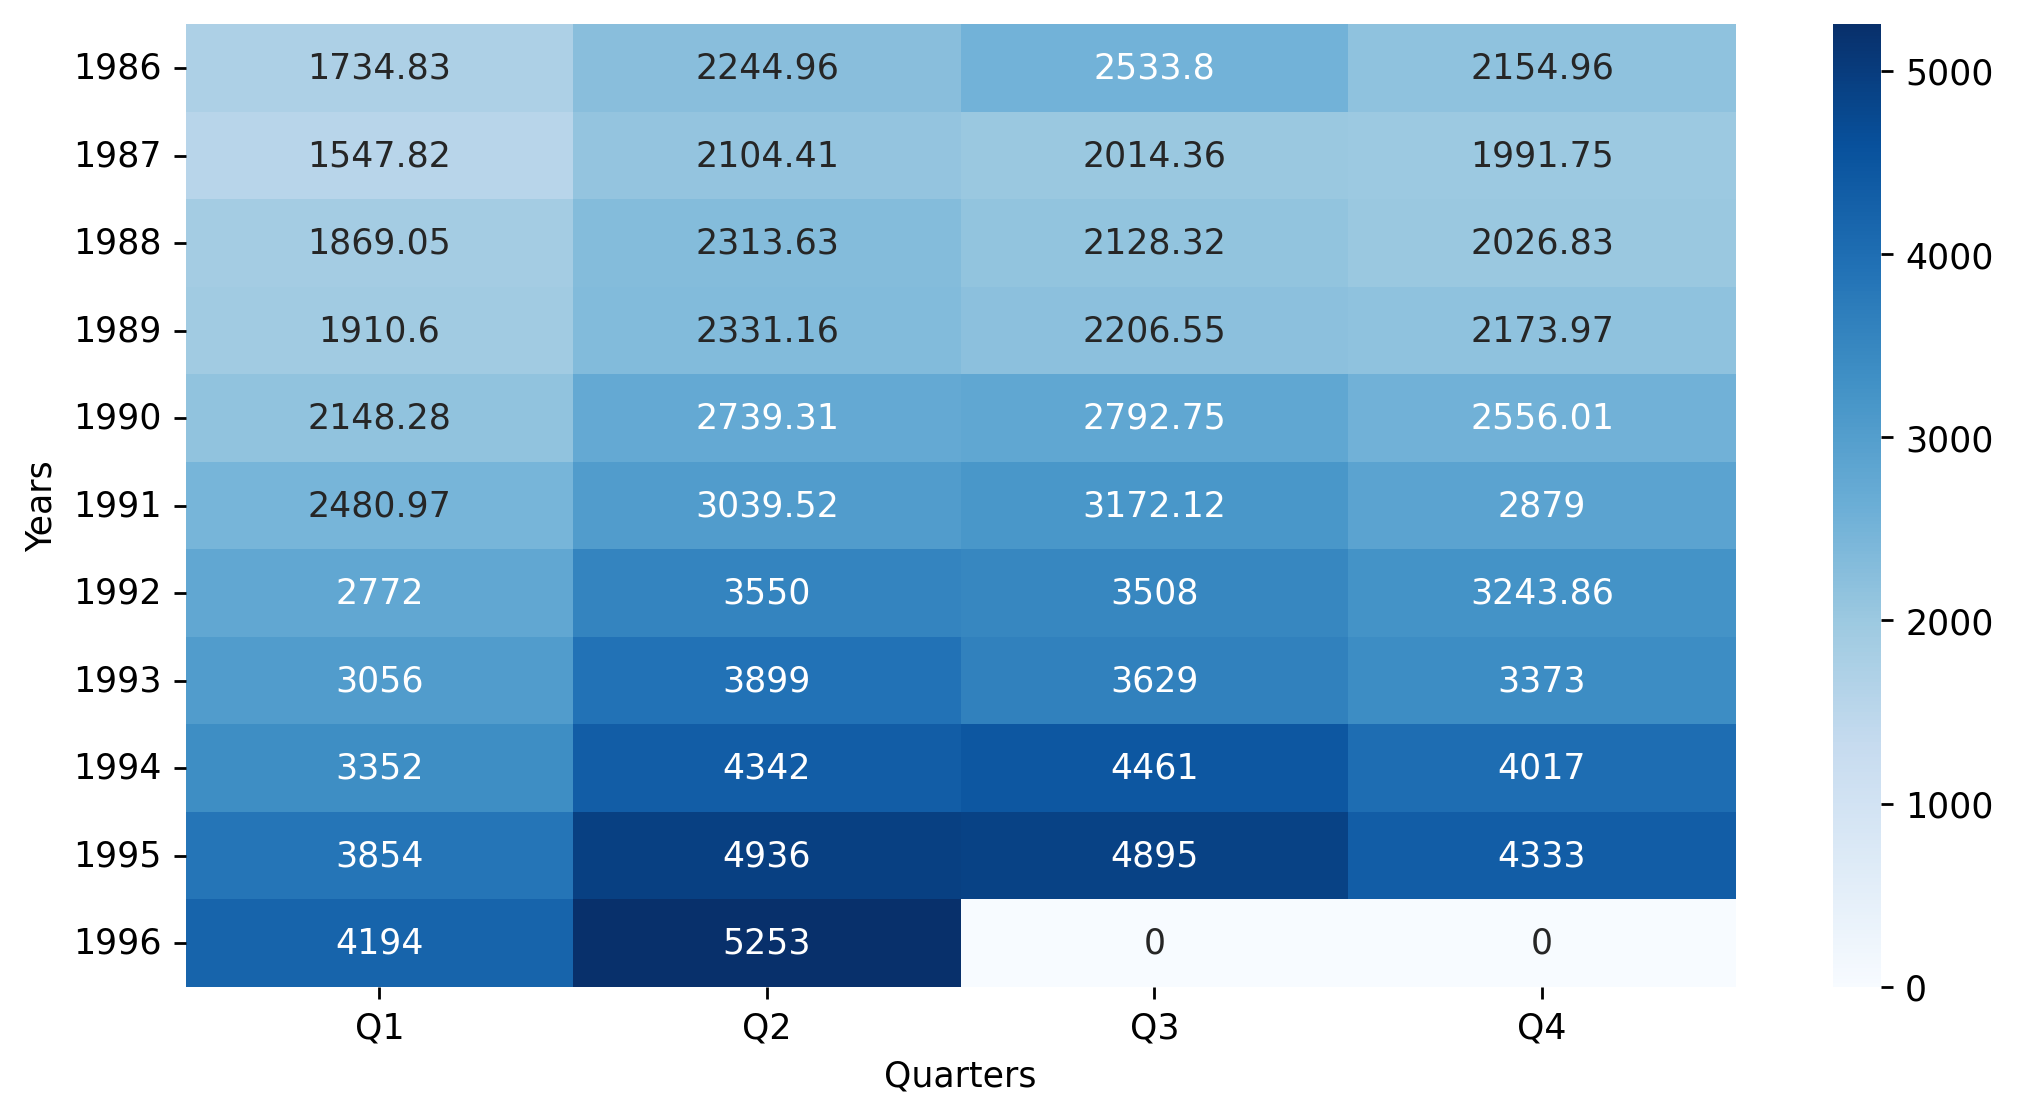

In [14]:
df_heatmap = pd.pivot_table(data = data, values = 'Sales', index = 'Years', columns = 'Quarters', aggfunc = 'mean', fill_value = 0)
plt.figure(figsize = (10,5), dpi = 250)
sns.heatmap(df_heatmap, annot = True, cmap = 'Blues', fmt = 'g')

In [15]:
dummy_var = pd.get_dummies(data['Quarters'], prefix='', prefix_sep='')
dummy_var

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [16]:
data = pd.concat([data, dummy_var], axis=1)
data

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1986,1,7.458663,1,1,0,0,0
1,Q2_86,2244.960999,Q2,1986,2,7.716443,4,0,1,0,0
2,Q3_86,2533.804993,Q3,1986,3,7.837477,9,0,0,1,0
3,Q4_86,2154.962997,Q4,1986,4,7.675529,16,0,0,0,1
4,Q1_87,1547.818996,Q1,1987,5,7.344602,25,1,0,0,0
5,Q2_87,2104.411995,Q2,1987,6,7.651791,36,0,1,0,0
6,Q3_87,2014.362999,Q3,1987,7,7.608058,49,0,0,1,0
7,Q4_87,1991.746998,Q4,1987,8,7.596767,64,0,0,0,1
8,Q1_88,1869.049999,Q1,1988,9,7.533186,81,1,0,0,0
9,Q2_88,2313.631996,Q2,1988,10,7.746574,100,0,1,0,0


In [17]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [18]:
# Boxplot

<Axes: >

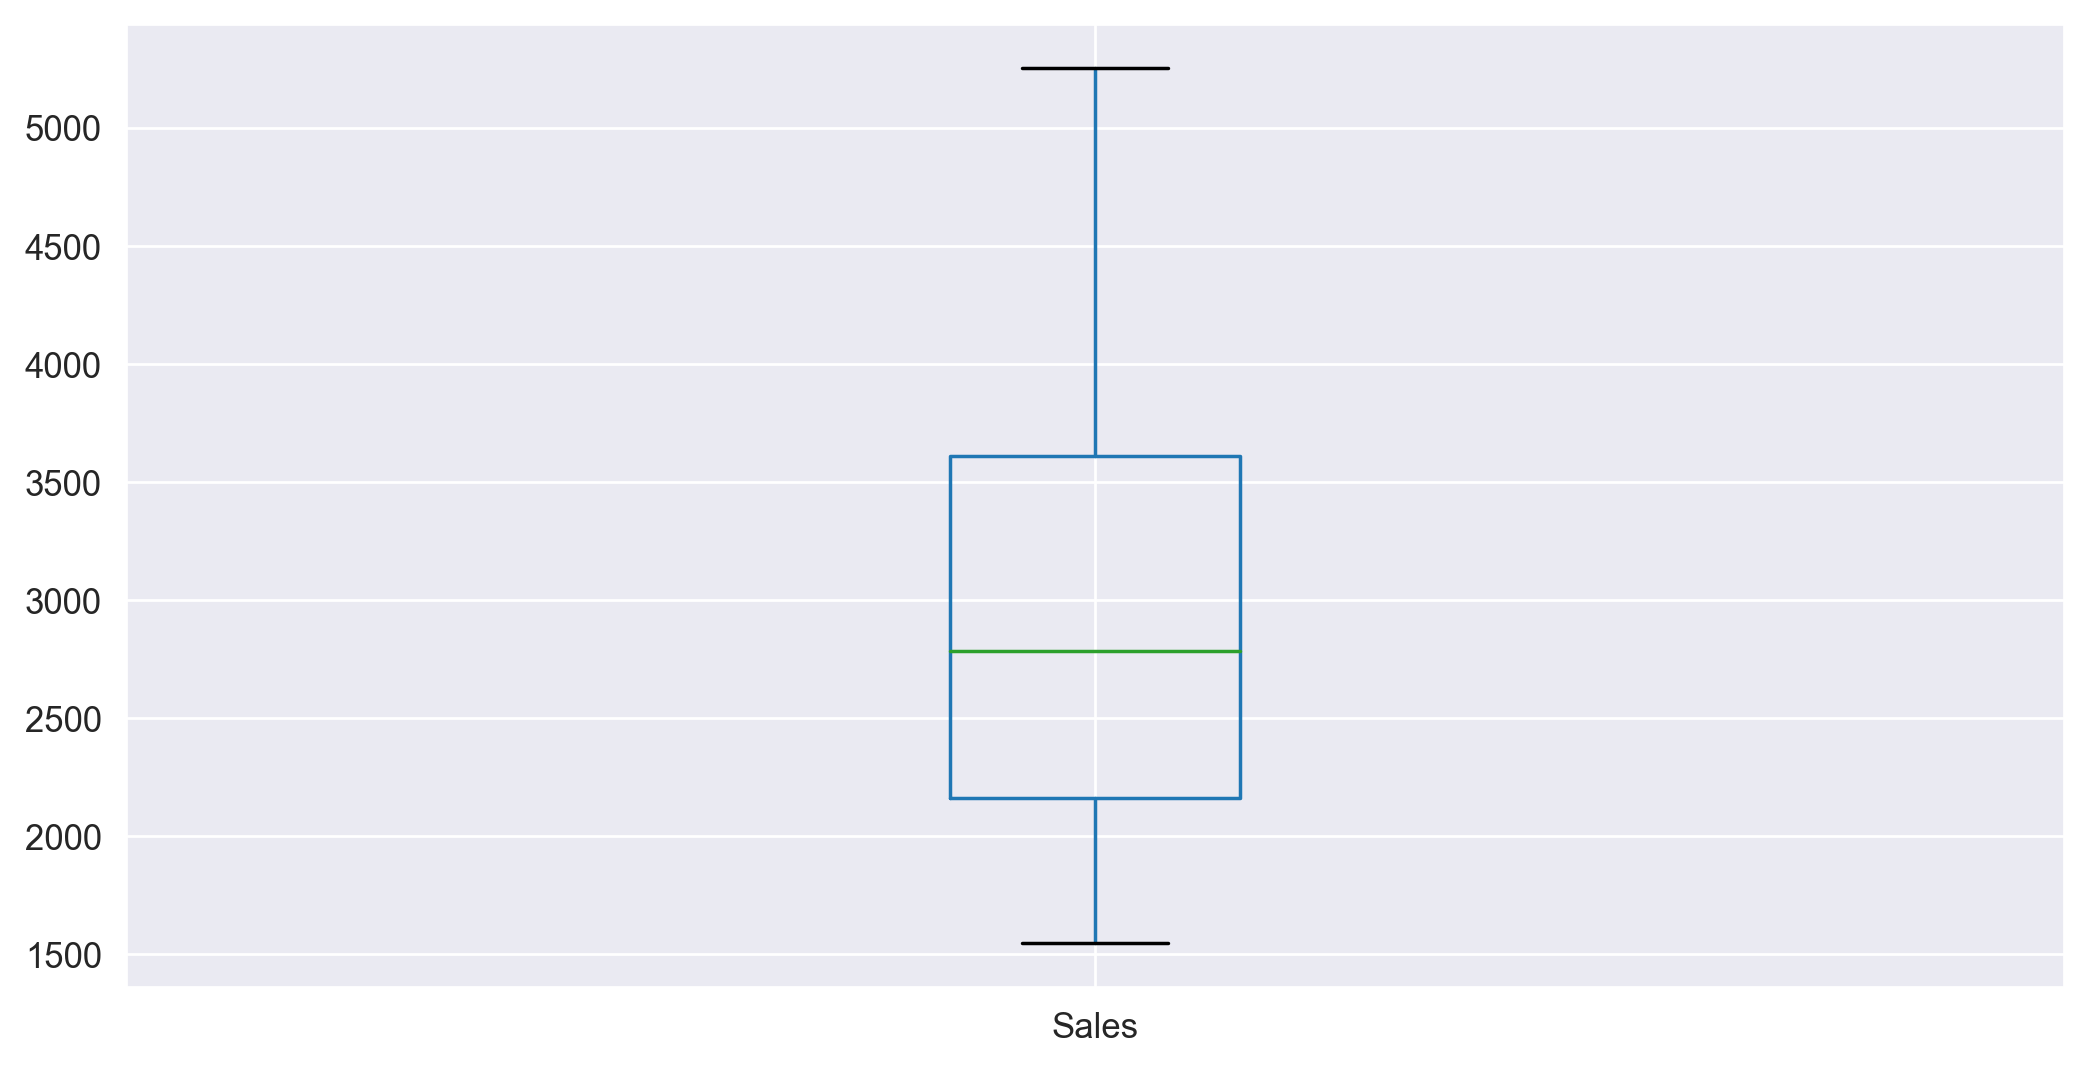

In [19]:
data[['Sales']].boxplot()

In [20]:
# Histogram

Text(0.5, 1.0, 'log_Sales')

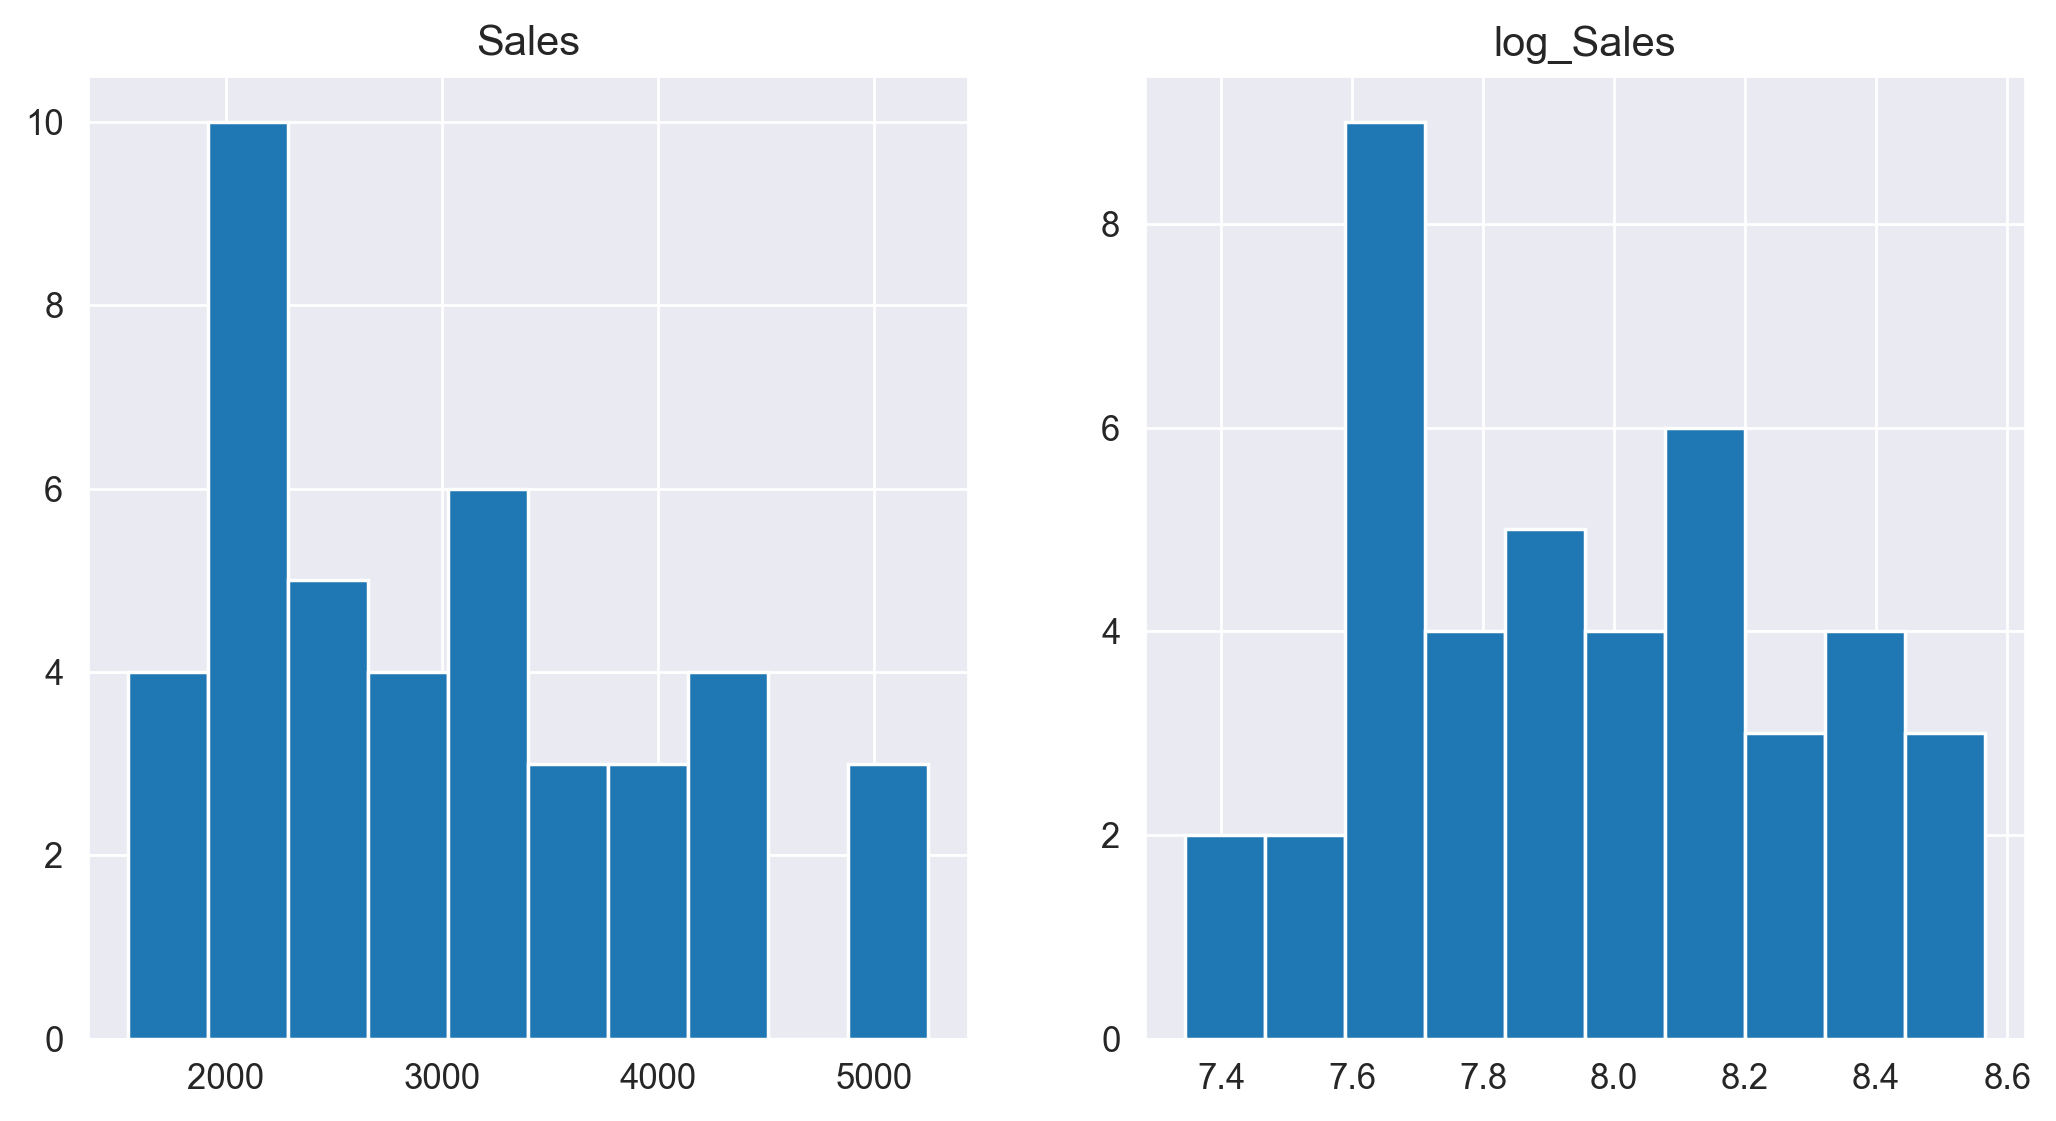

In [21]:
plt.subplot(121)
plt.hist(data['Sales'])
plt.title('Sales')

plt.subplot(122)
plt.hist(data['log_Sales'])
plt.title('log_Sales')

In [22]:
# kde plot

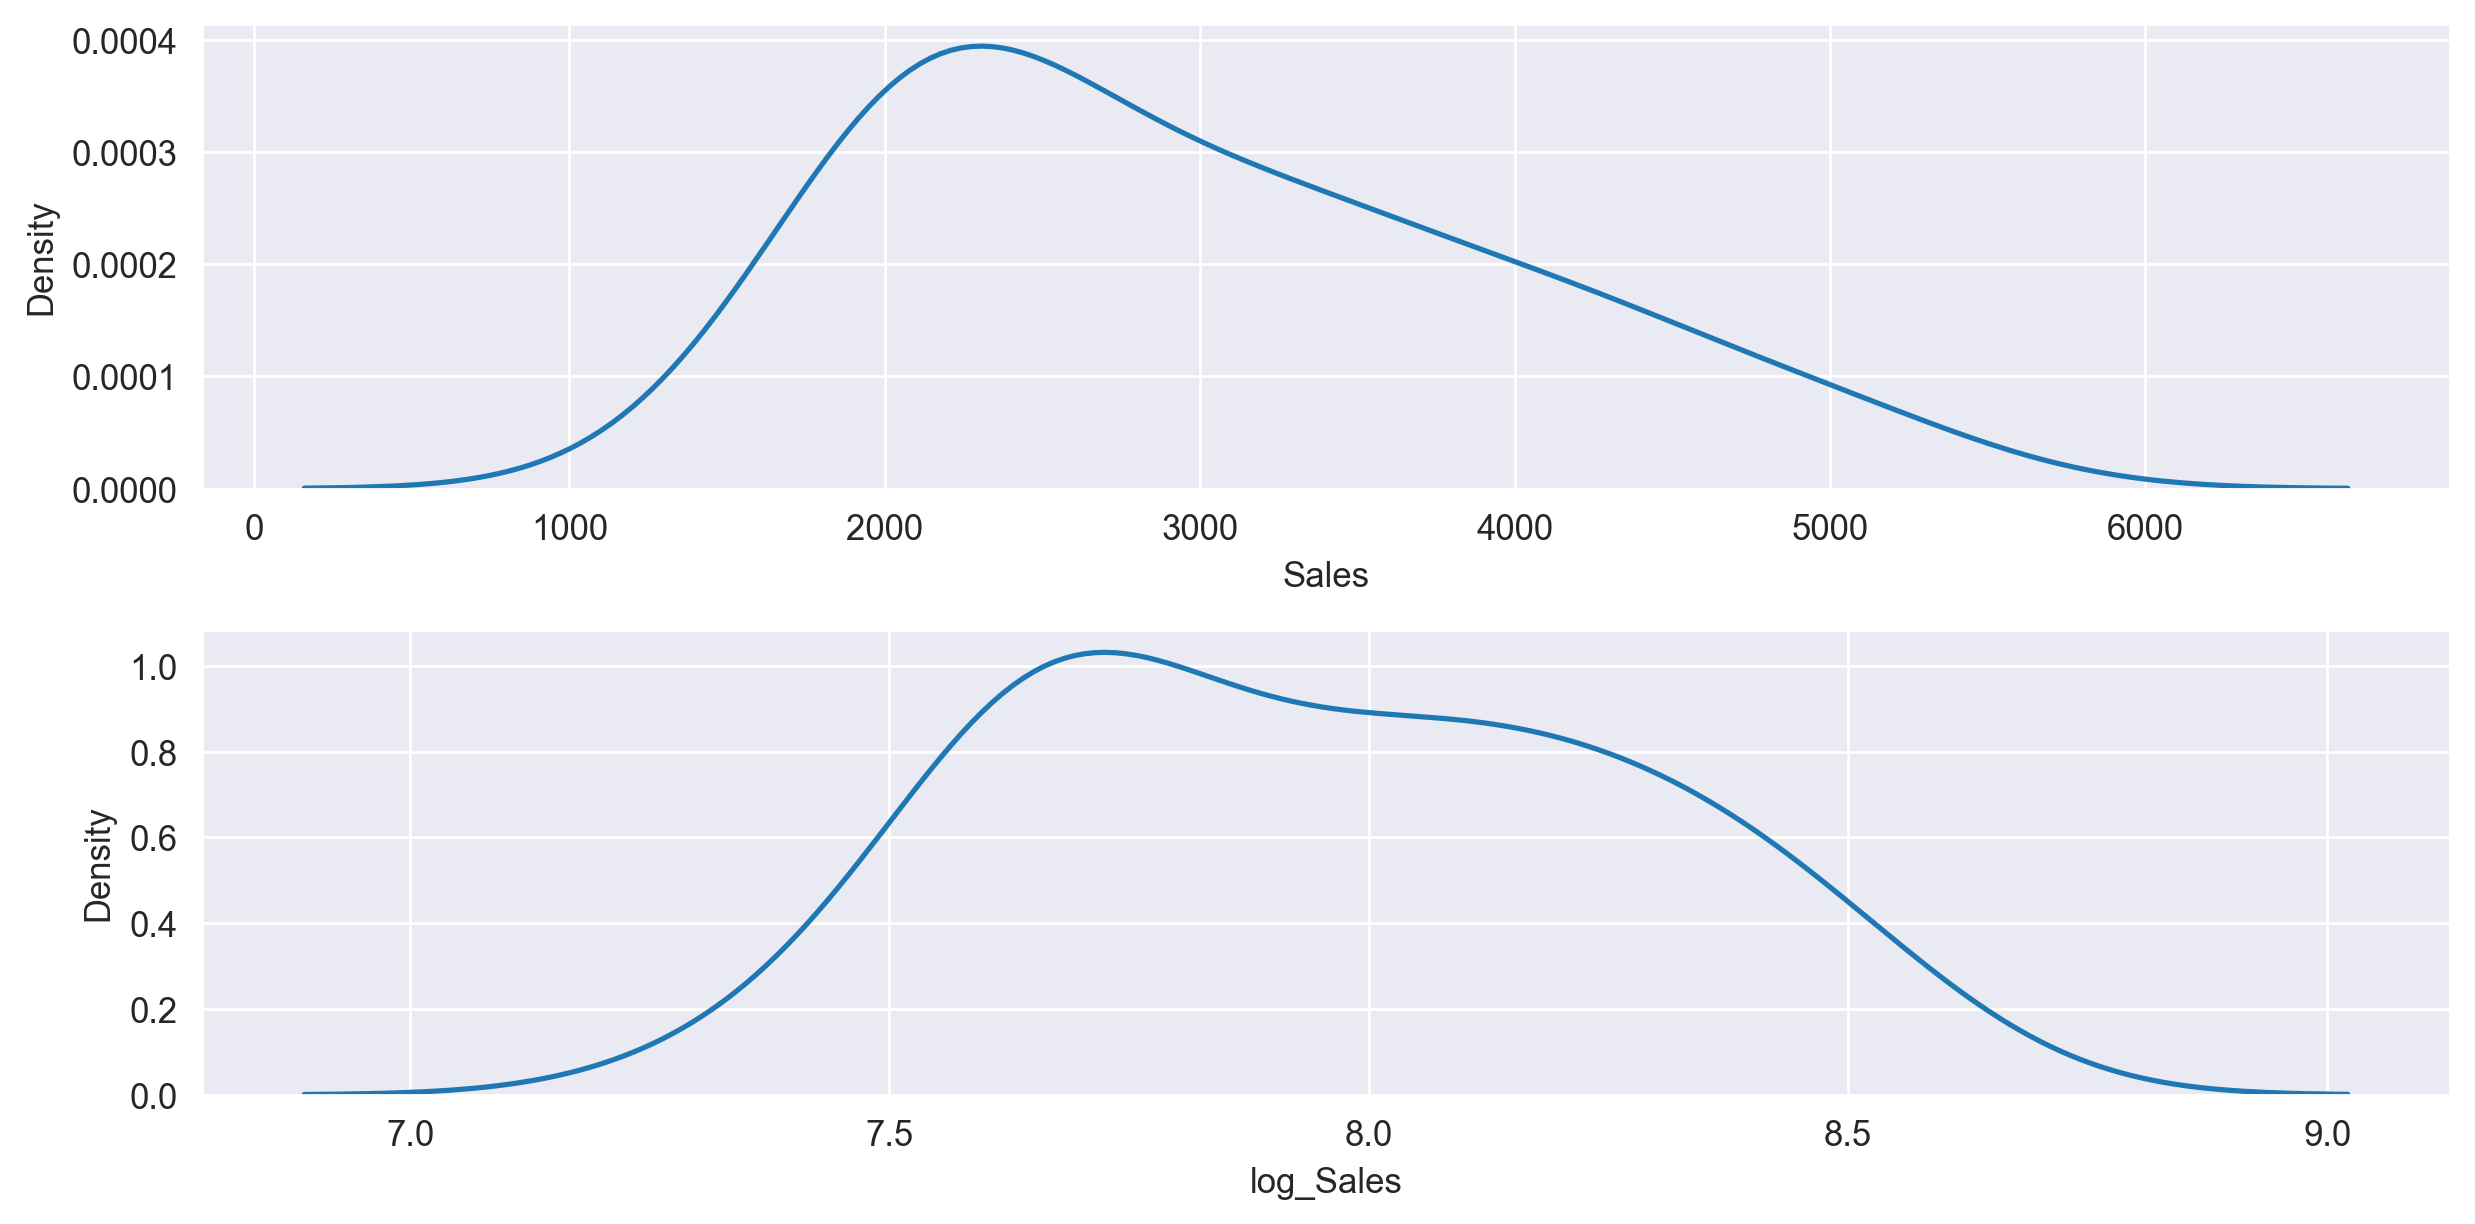

In [23]:
plt.subplot(211)
sns.kdeplot(data['Sales'])

plt.subplot(212)
sns.kdeplot(data['log_Sales'])
plt.tight_layout()

<Axes: xlabel='Quarters', ylabel='Sales'>

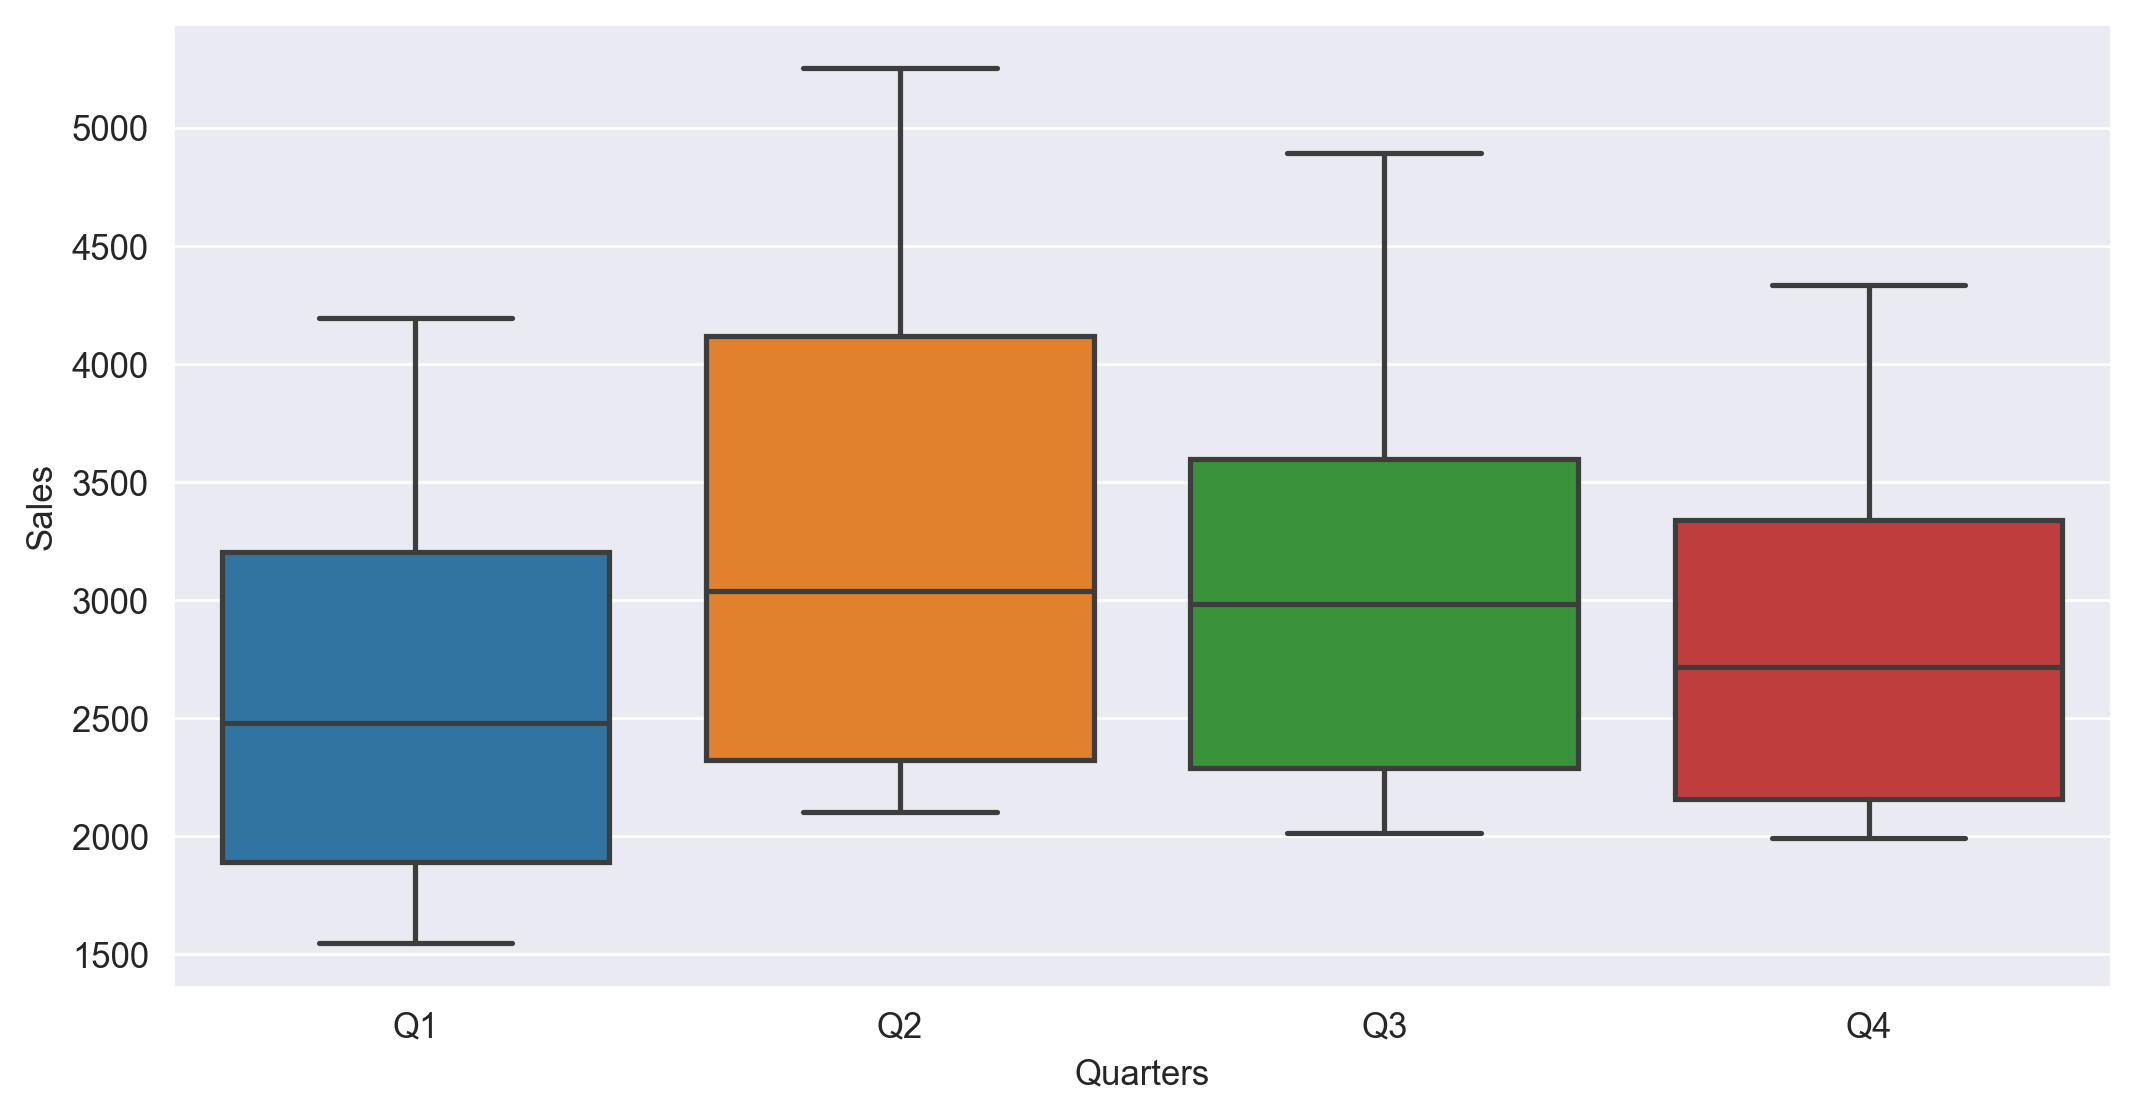

In [24]:
sns.boxplot(x = 'Quarters', y = 'Sales', data = data)

<Axes: xlabel='Quarters', ylabel='Sales'>

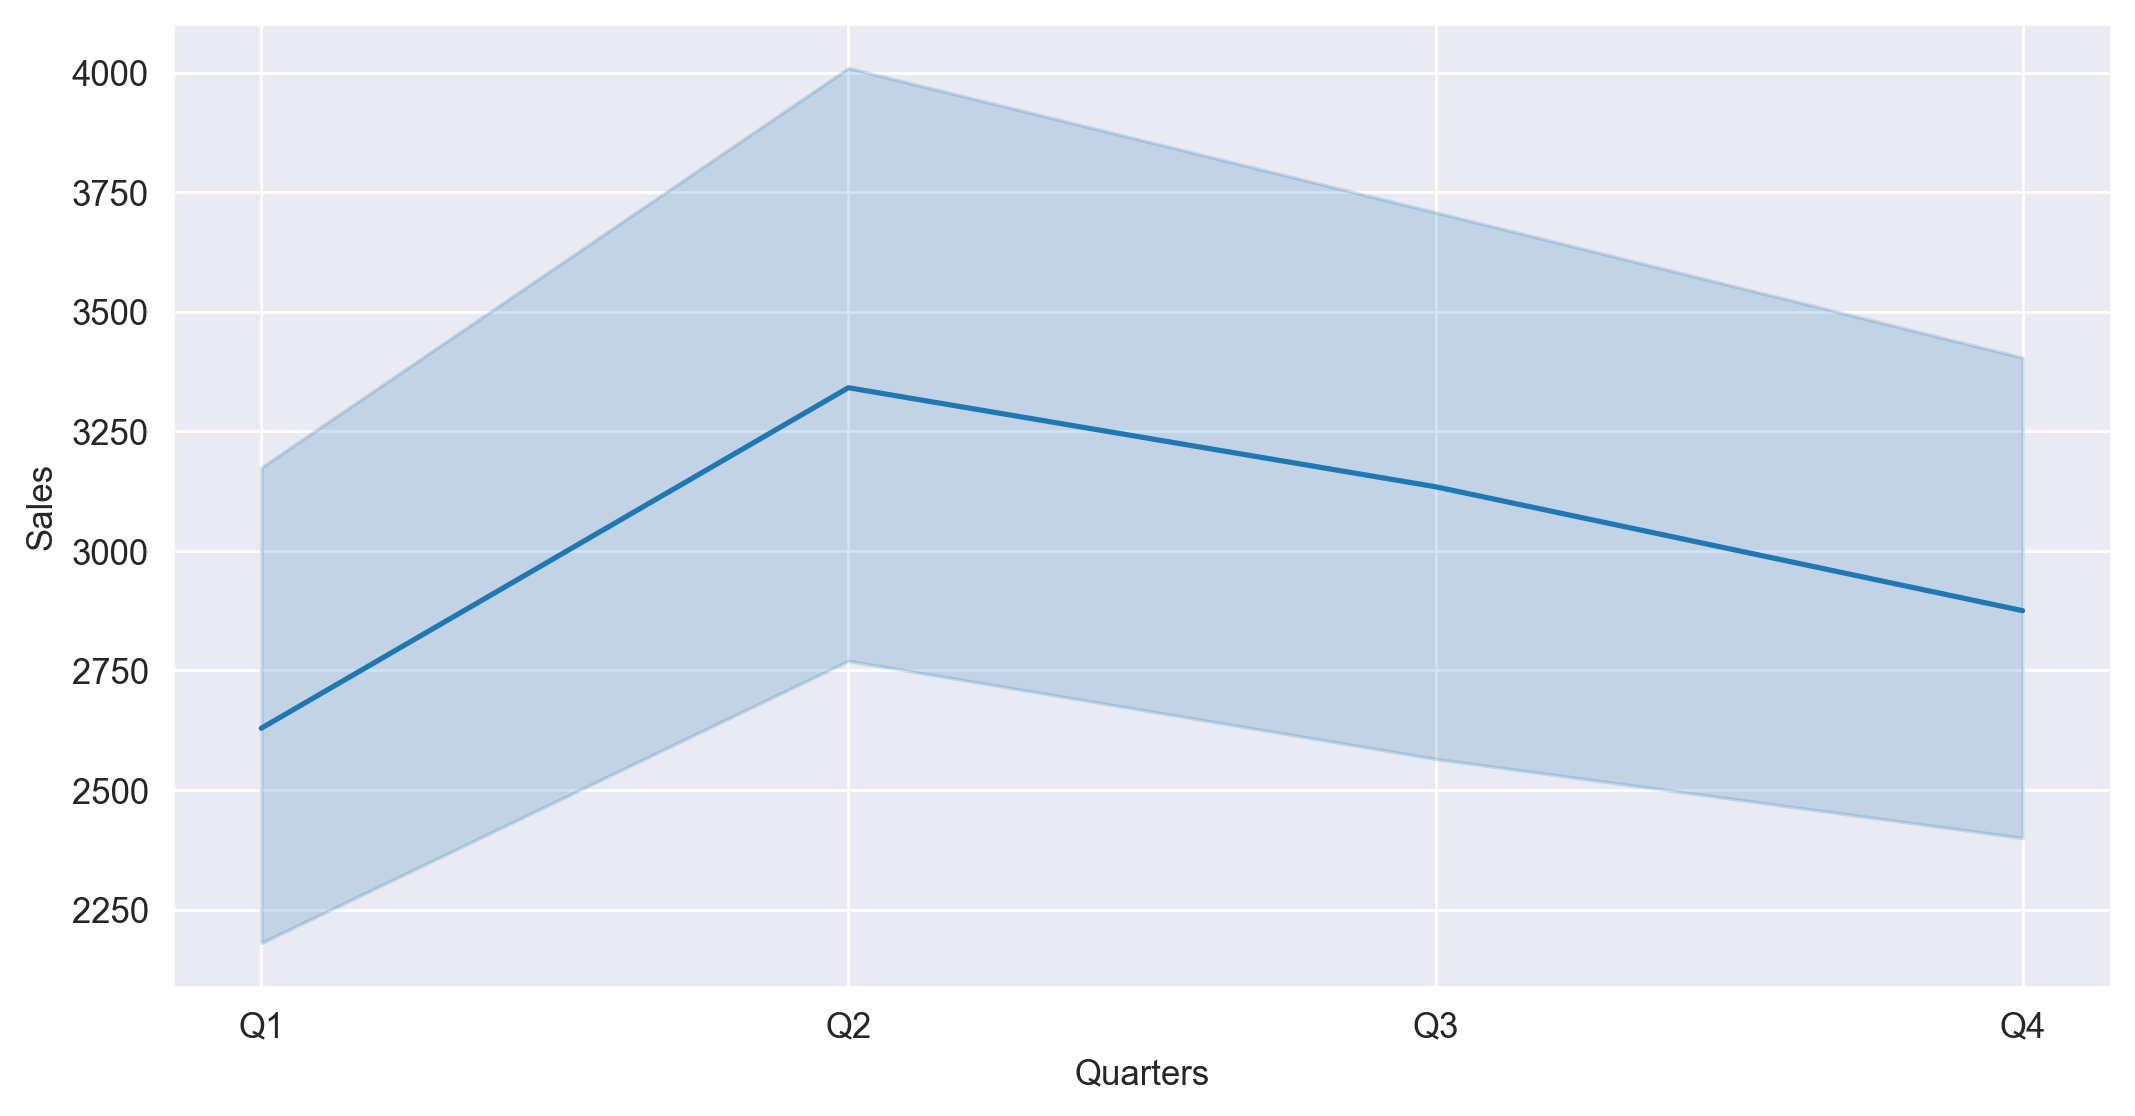

In [25]:
sns.lineplot(x = 'Quarters', y = 'Sales', data = data)

<Axes: xlabel='Years', ylabel='Sales'>

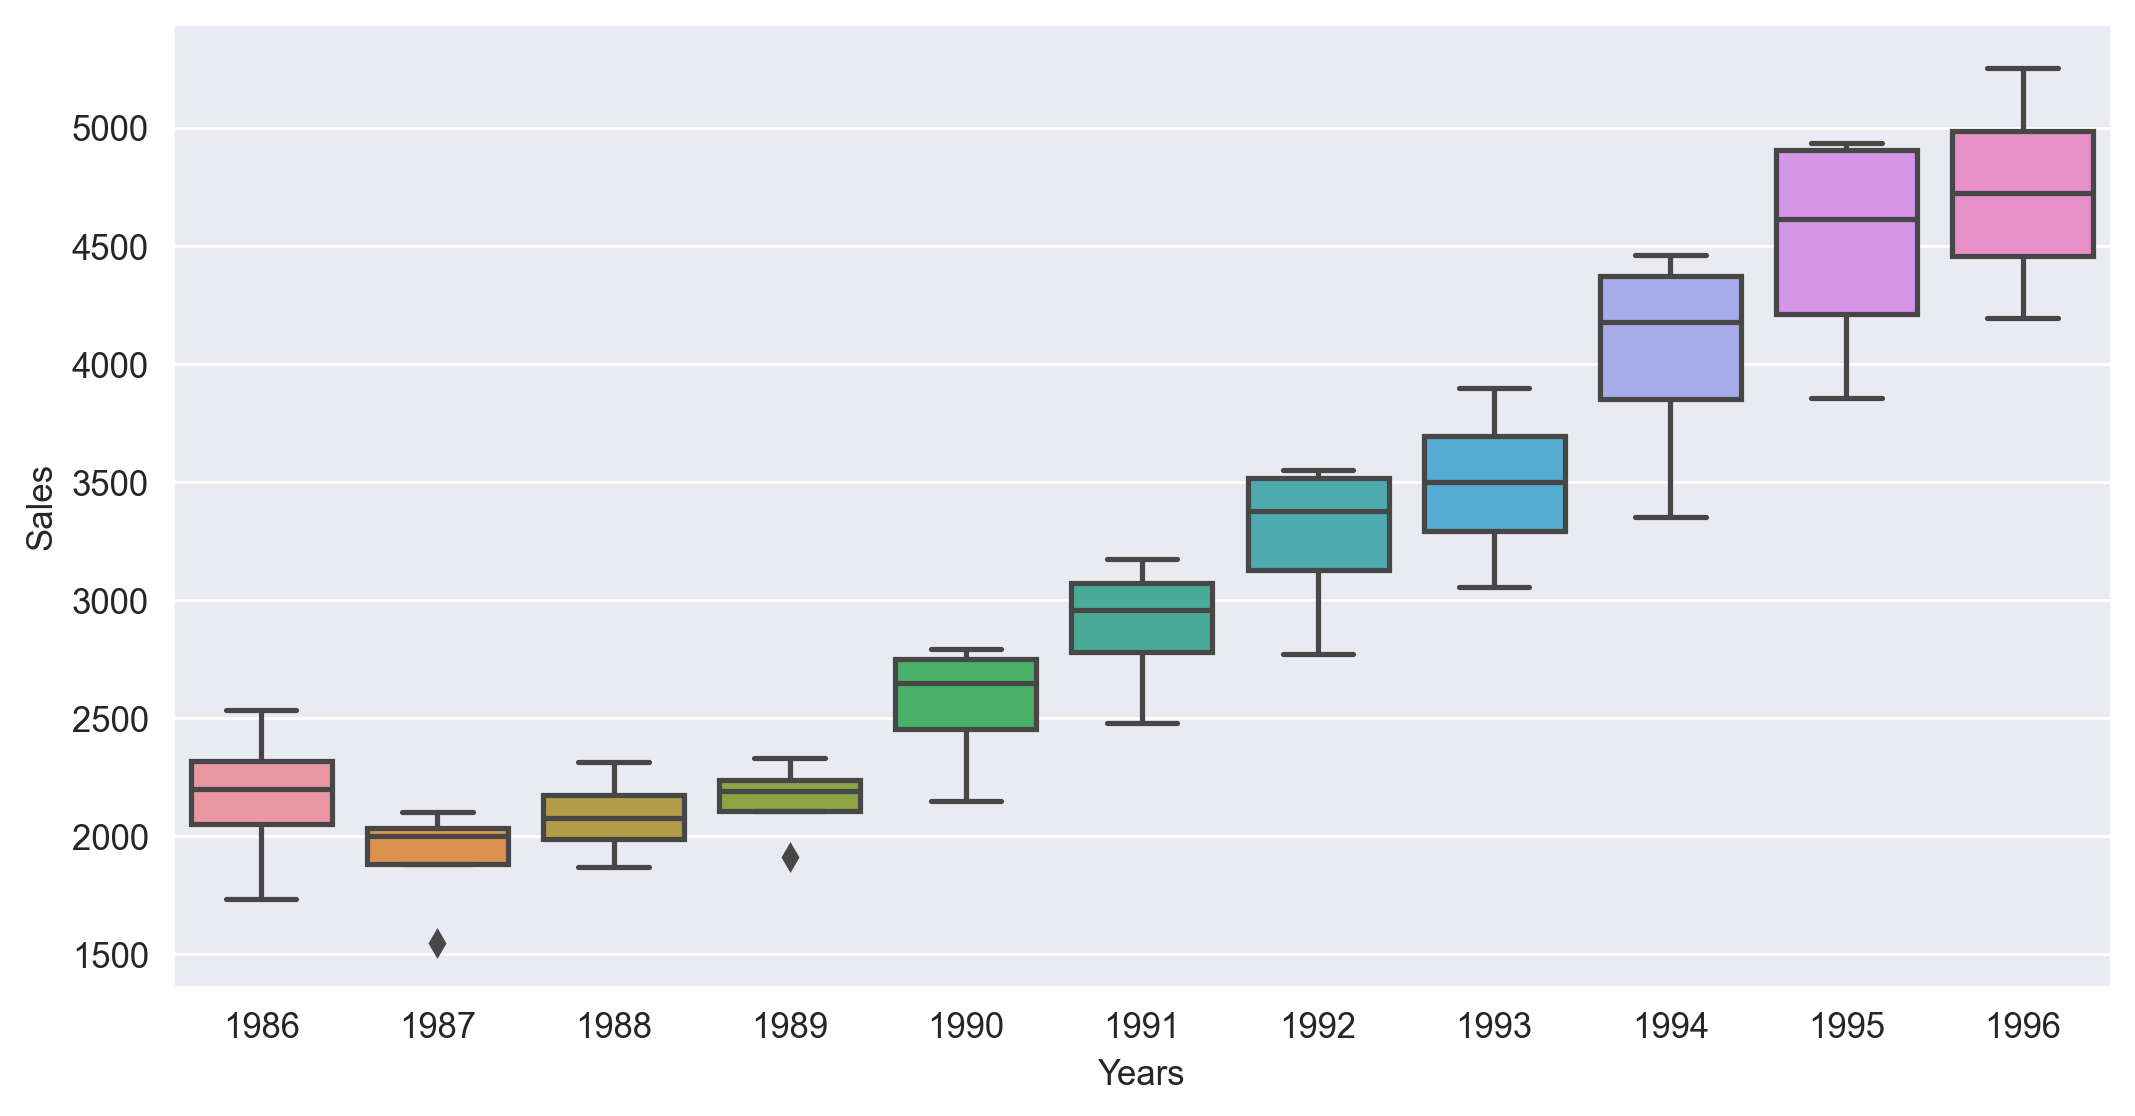

In [26]:
sns.boxplot(x = 'Years', y = 'Sales', data = data)

<Axes: xlabel='Years', ylabel='Sales'>

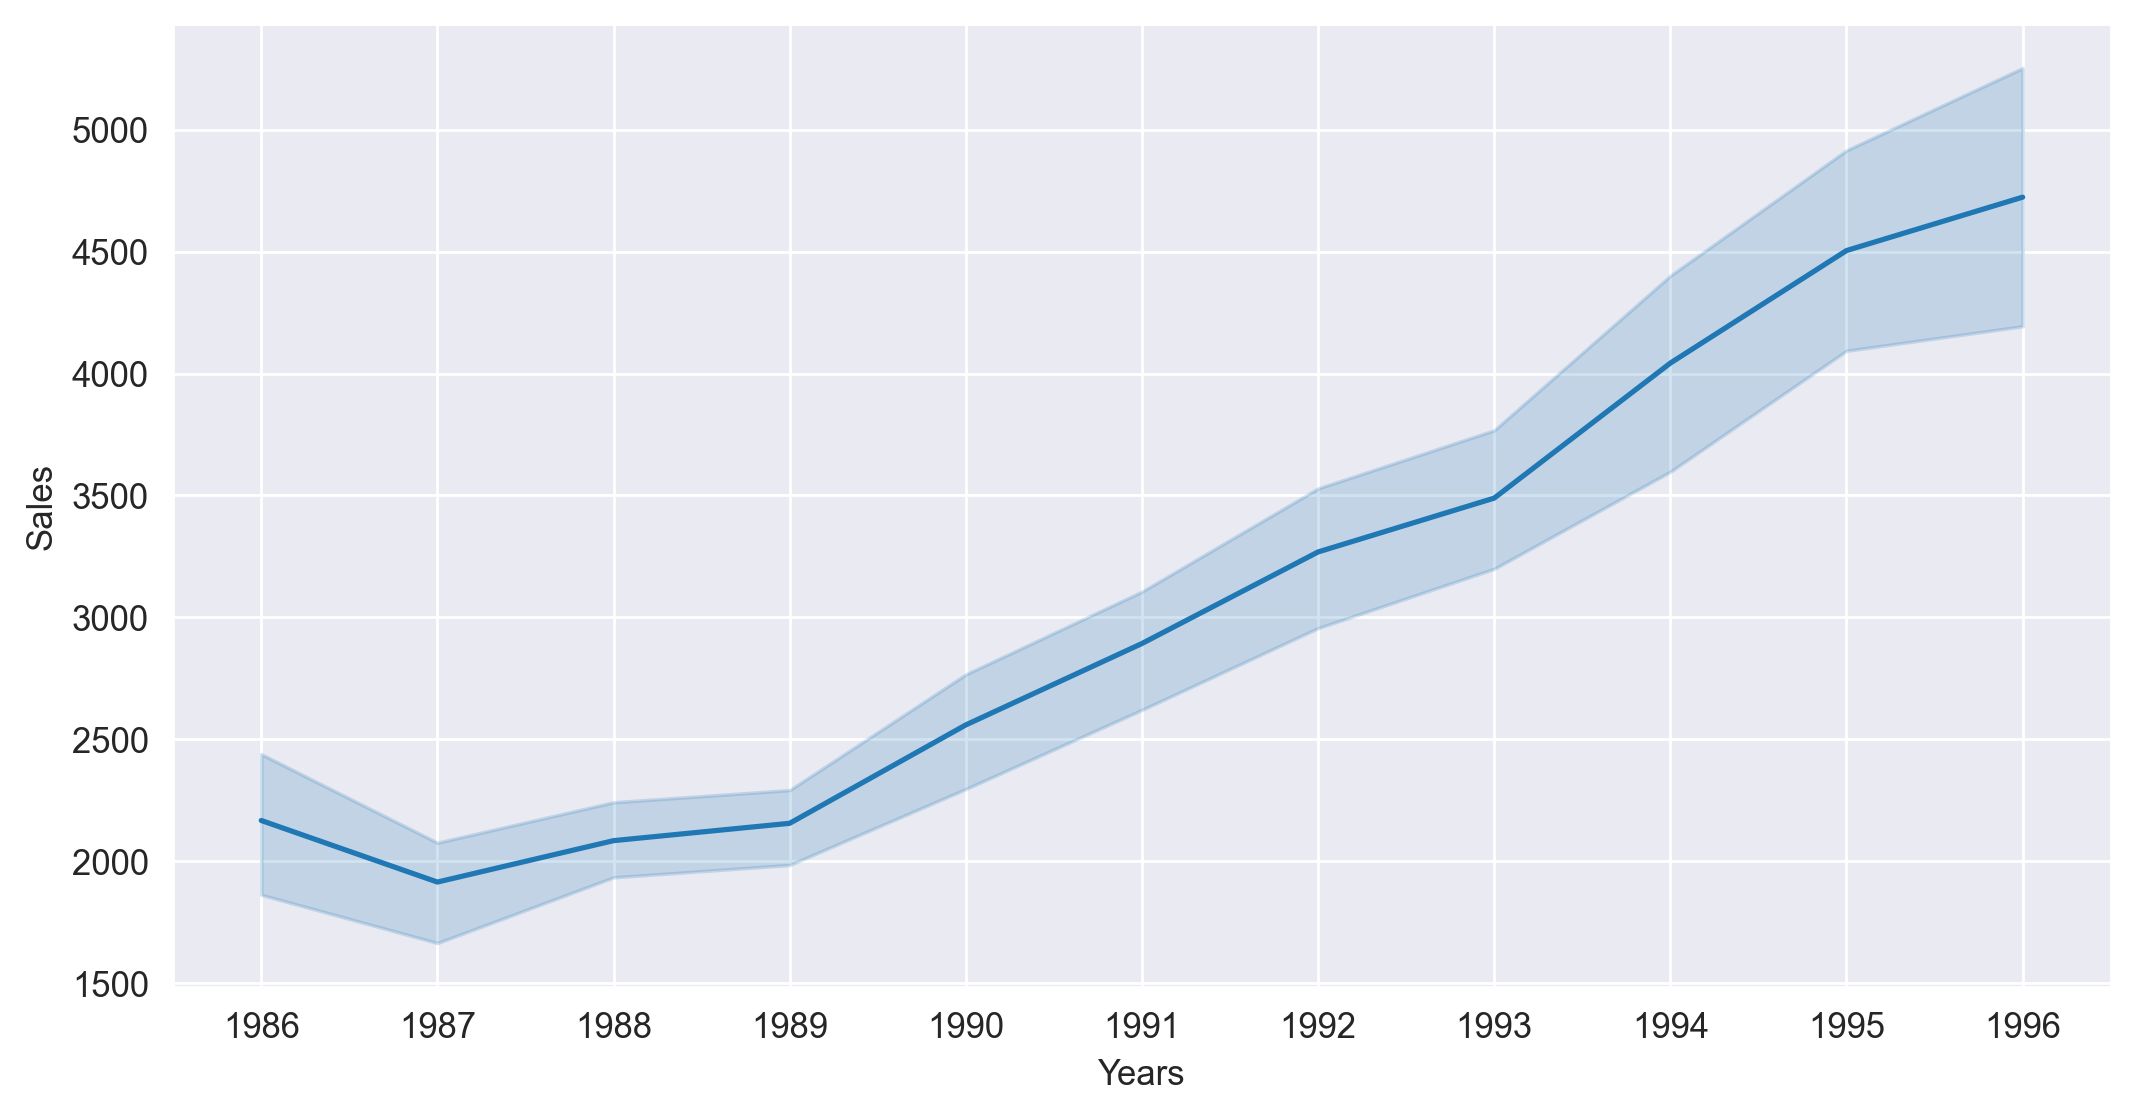

In [27]:
sns.lineplot(x = 'Years', y = 'Sales', data = data)

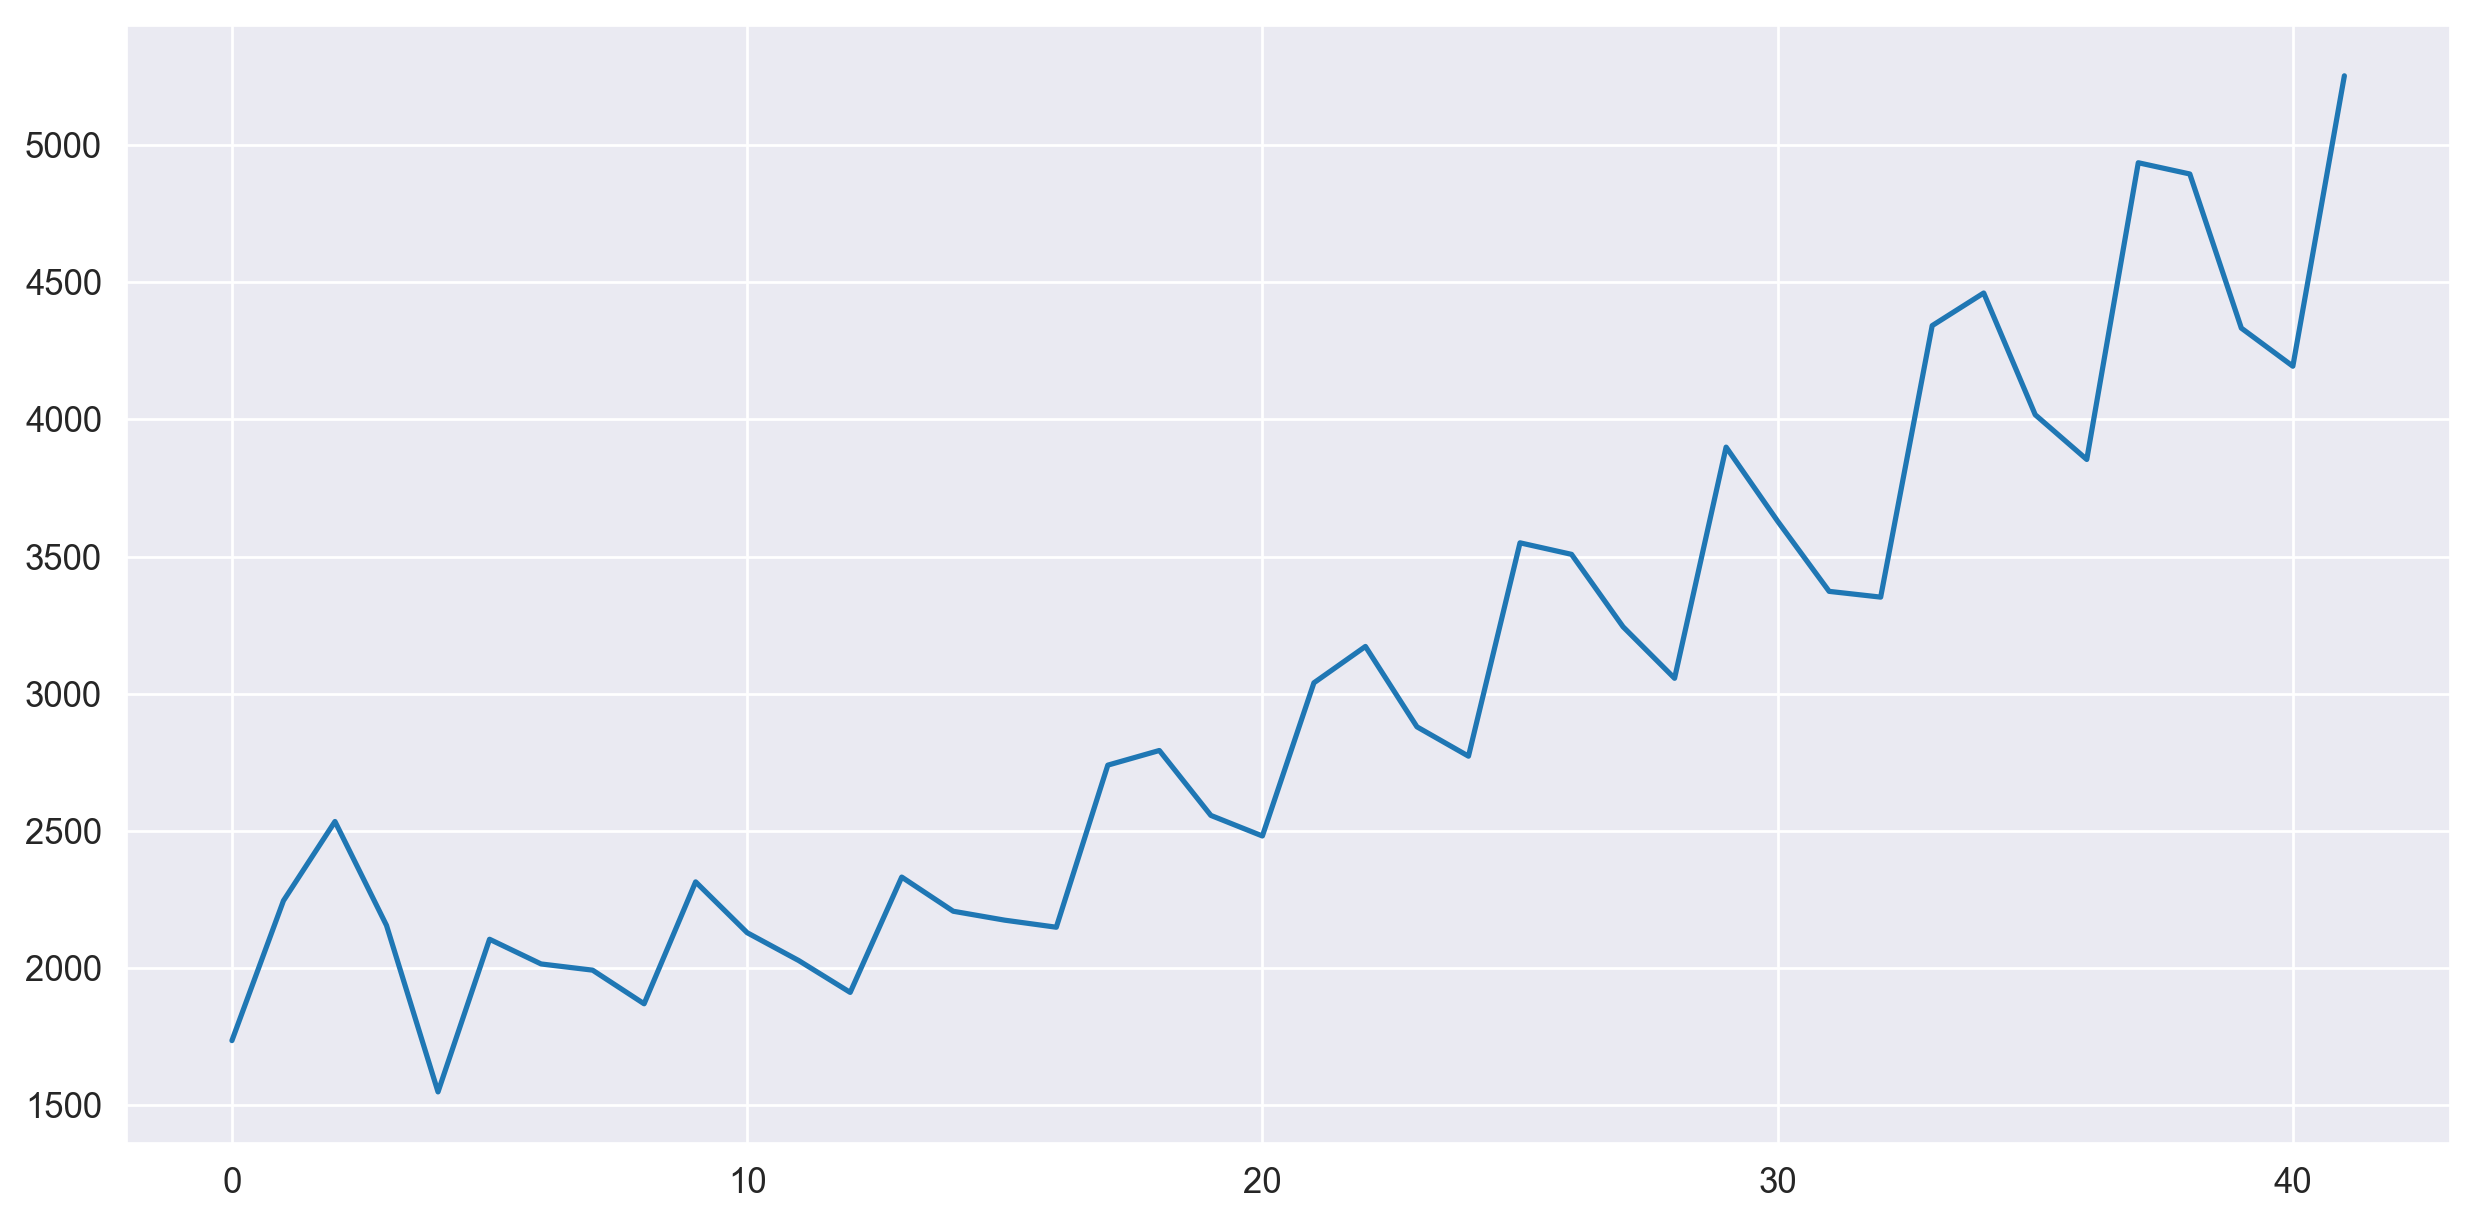

In [28]:
plt.plot(data['Sales'])
plt.tight_layout()

- Above data is not stationary

In [29]:
# Calculating first order differencing

In [30]:
data['First_order'] = data['Sales'].diff(periods = 1)
data

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square,Q1,Q2,Q3,Q4,First_order
0,Q1_86,1734.827000,Q1,1986,1,7.458663,1,1,0,0,0,NaN
1,Q2_86,2244.960999,Q2,1986,2,7.716443,4,0,1,0,0,510.133999
2,Q3_86,2533.804993,Q3,1986,3,7.837477,9,0,0,1,0,288.843994
3,Q4_86,2154.962997,Q4,1986,4,7.675529,16,0,0,0,1,-378.841995
4,Q1_87,1547.818996,Q1,1987,5,7.344602,25,1,0,0,0,-607.144001
5,Q2_87,2104.411995,Q2,1987,6,7.651791,36,0,1,0,0,556.592999
6,Q3_87,2014.362999,Q3,1987,7,7.608058,49,0,0,1,0,-90.048996
7,Q4_87,1991.746998,Q4,1987,8,7.596767,64,0,0,0,1,-22.616001
8,Q1_88,1869.049999,Q1,1988,9,7.533186,81,1,0,0,0,-122.696999
9,Q2_88,2313.631996,Q2,1988,10,7.746574,100,0,1,0,0,444.581997


In [31]:
data.dropna(inplace = True)
data

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square,Q1,Q2,Q3,Q4,First_order
1,Q2_86,2244.960999,Q2,1986,2,7.716443,4,0,1,0,0,510.133999
2,Q3_86,2533.804993,Q3,1986,3,7.837477,9,0,0,1,0,288.843994
3,Q4_86,2154.962997,Q4,1986,4,7.675529,16,0,0,0,1,-378.841995
4,Q1_87,1547.818996,Q1,1987,5,7.344602,25,1,0,0,0,-607.144001
5,Q2_87,2104.411995,Q2,1987,6,7.651791,36,0,1,0,0,556.592999
6,Q3_87,2014.362999,Q3,1987,7,7.608058,49,0,0,1,0,-90.048996
7,Q4_87,1991.746998,Q4,1987,8,7.596767,64,0,0,0,1,-22.616001
8,Q1_88,1869.049999,Q1,1988,9,7.533186,81,1,0,0,0,-122.696999
9,Q2_88,2313.631996,Q2,1988,10,7.746574,100,0,1,0,0,444.581997
10,Q3_88,2128.320000,Q3,1988,11,7.663088,121,0,0,1,0,-185.311996


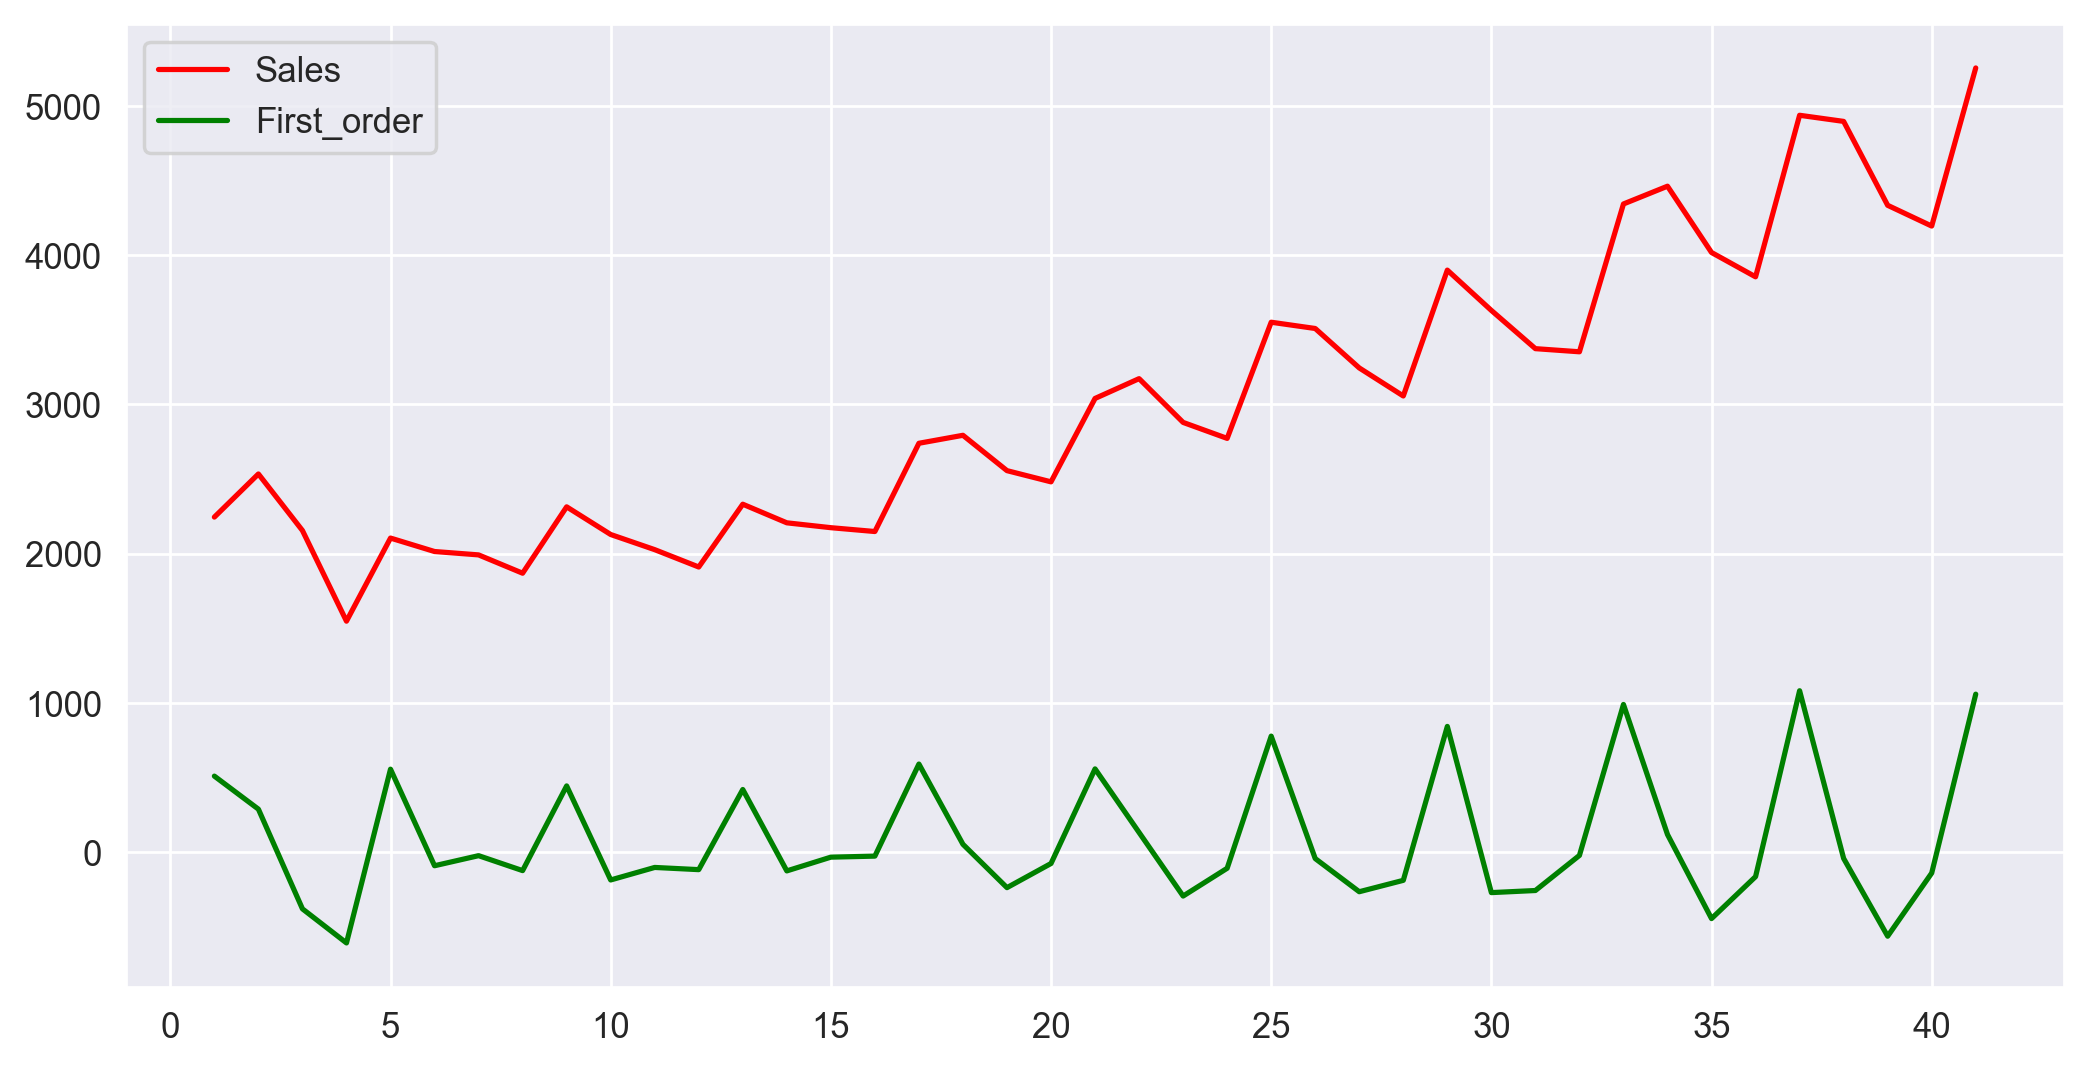

In [32]:
plt.plot(data['Sales'], color = 'red', label = 'Sales')
plt.plot(data['First_order'], color = 'green', label = 'First_order')
plt.legend()

In [33]:
# Autocorrelation

In [34]:
acf_values = acf(data['First_order'])
acf_values

array([ 1.        , -0.12698142, -0.58248117, -0.14078903,  0.77149614,
       -0.14552797, -0.45200093, -0.08720848,  0.63989518, -0.10590553,
       -0.36920089, -0.09077286,  0.53661329, -0.13653501, -0.34381079,
       -0.04096384,  0.48023407])

In [35]:
# plot acf

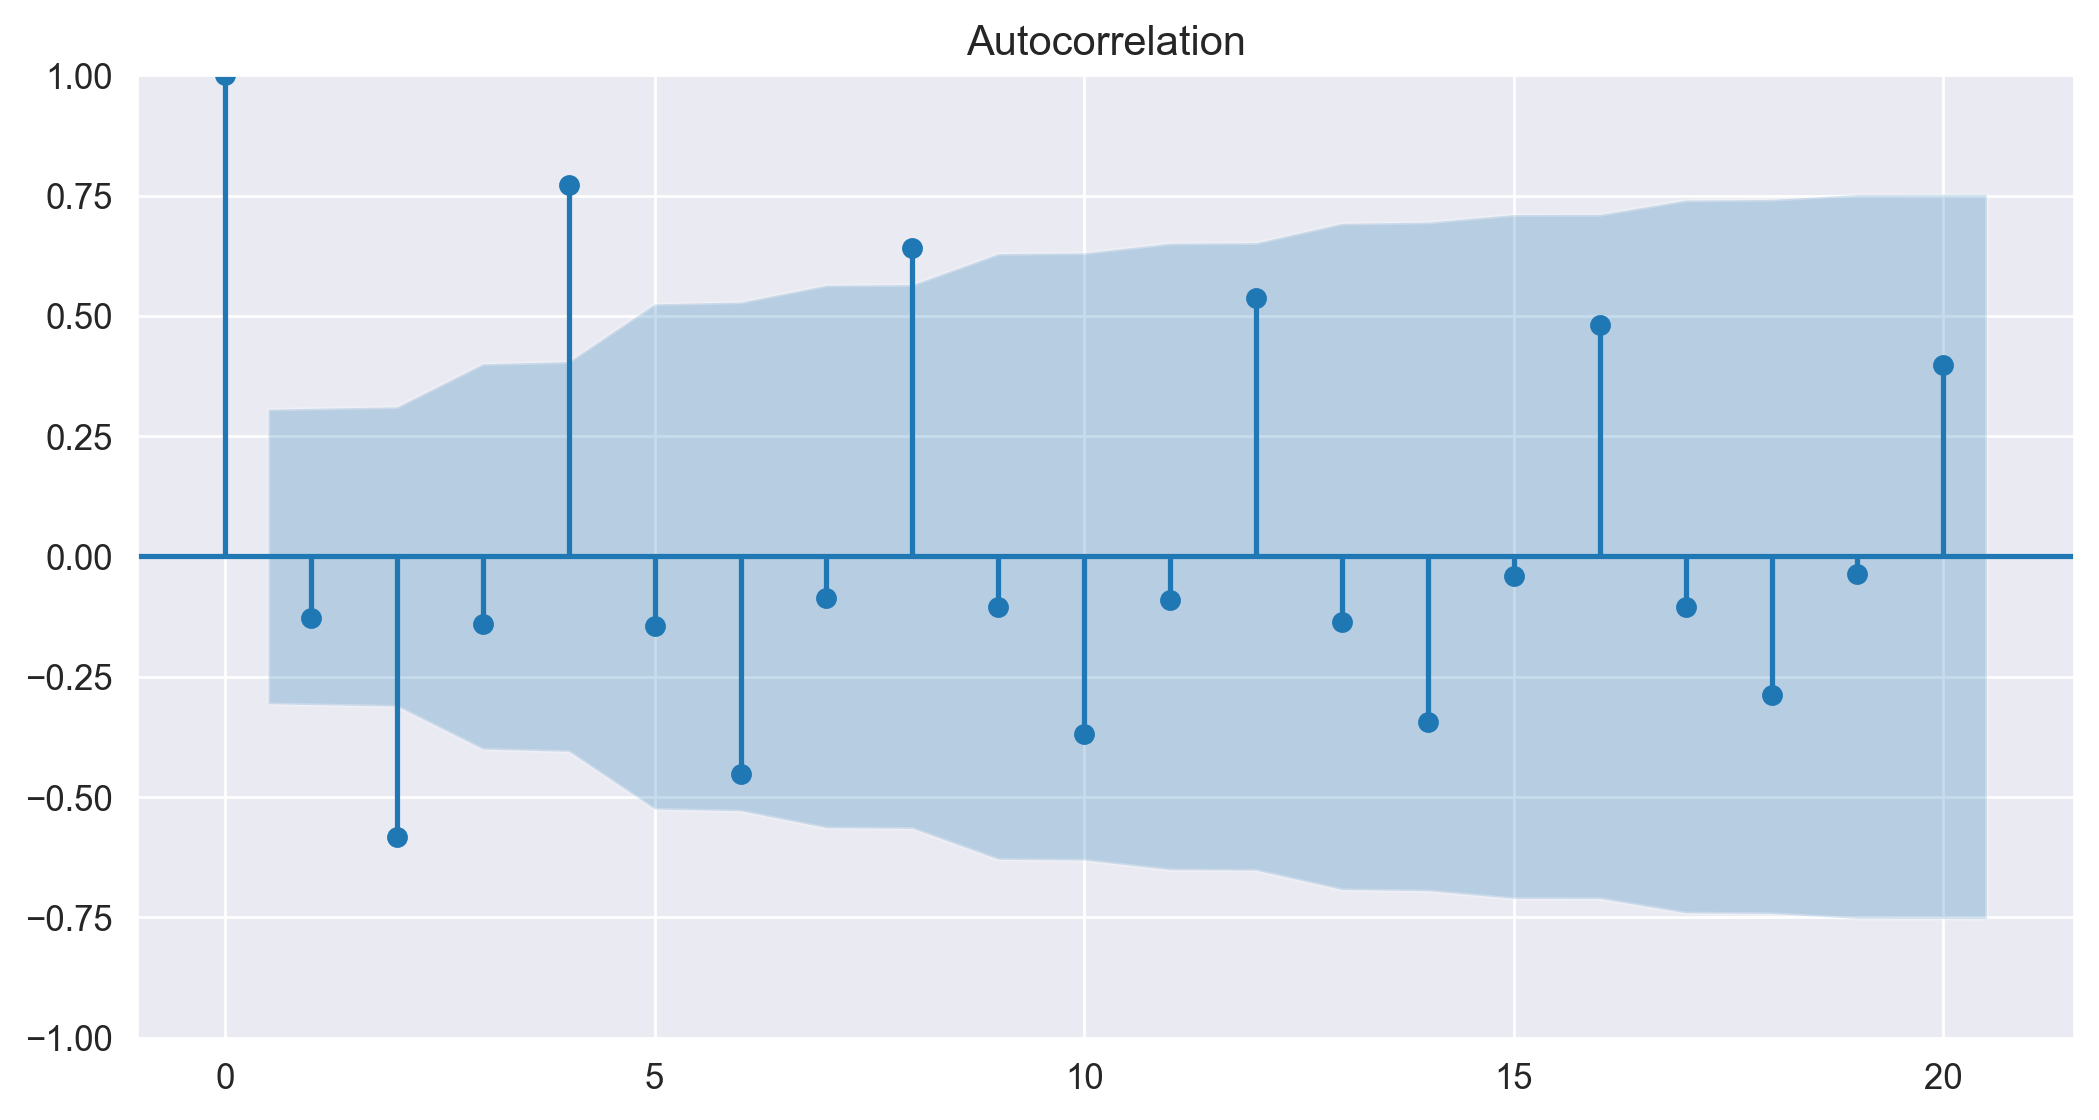

In [36]:
plot_acf(data['First_order'], lags = 20);

In [37]:
# Calculating pacf

In [38]:
pacf_values = pacf(data['First_order'])
pacf_values

array([ 1.        , -0.13015595, -0.64013685, -0.6306896 ,  0.58559493,
       -0.39750543,  0.1046144 , -0.0772609 ,  0.18417045,  0.20544454,
       -0.00904403,  0.06302475,  0.30259239, -0.48114516, -0.13134357,
        0.0170421 , -0.28961627])

In [39]:
# Plot pacf

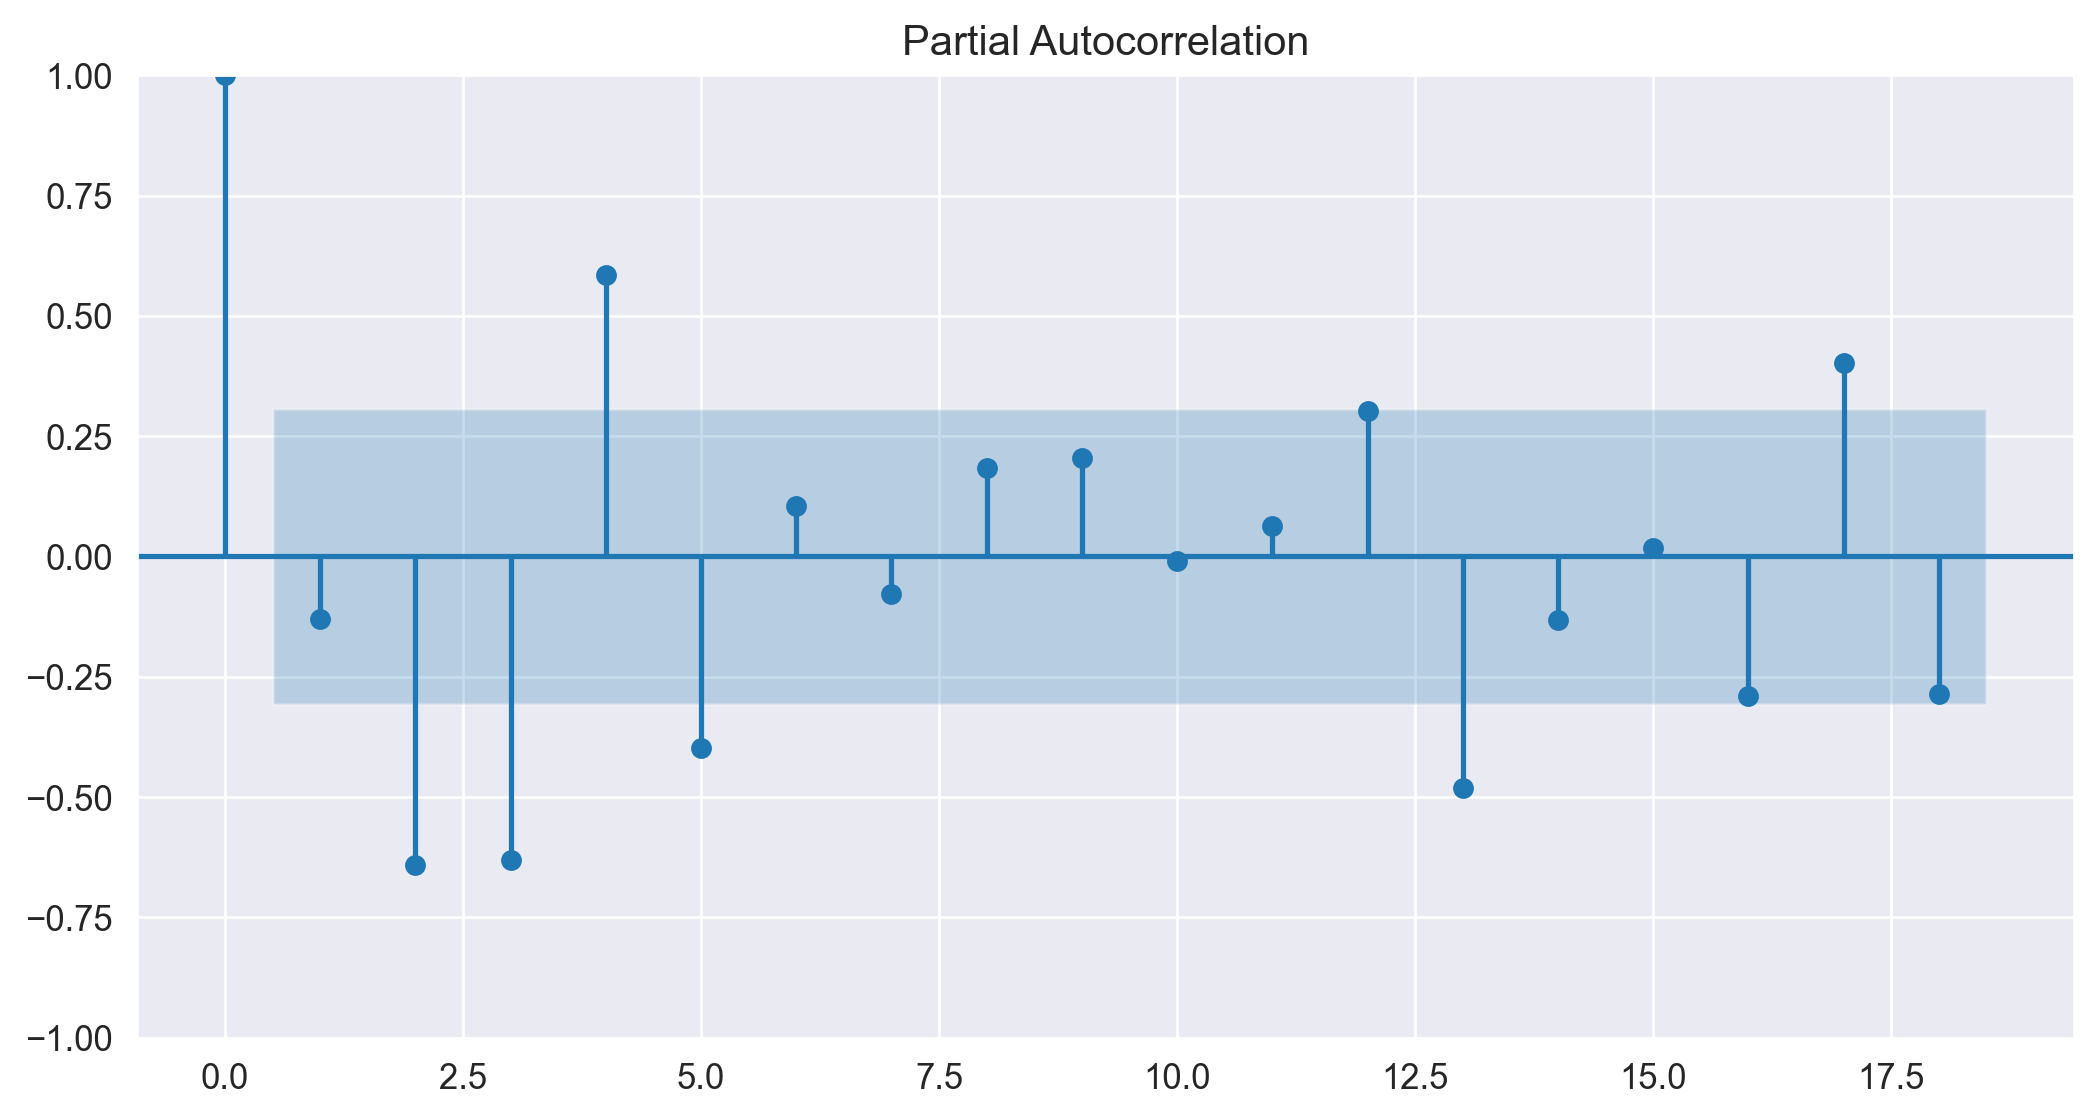

In [40]:
plot_pacf(data['First_order'], lags = 18);

- Time Series Decomposition Plot

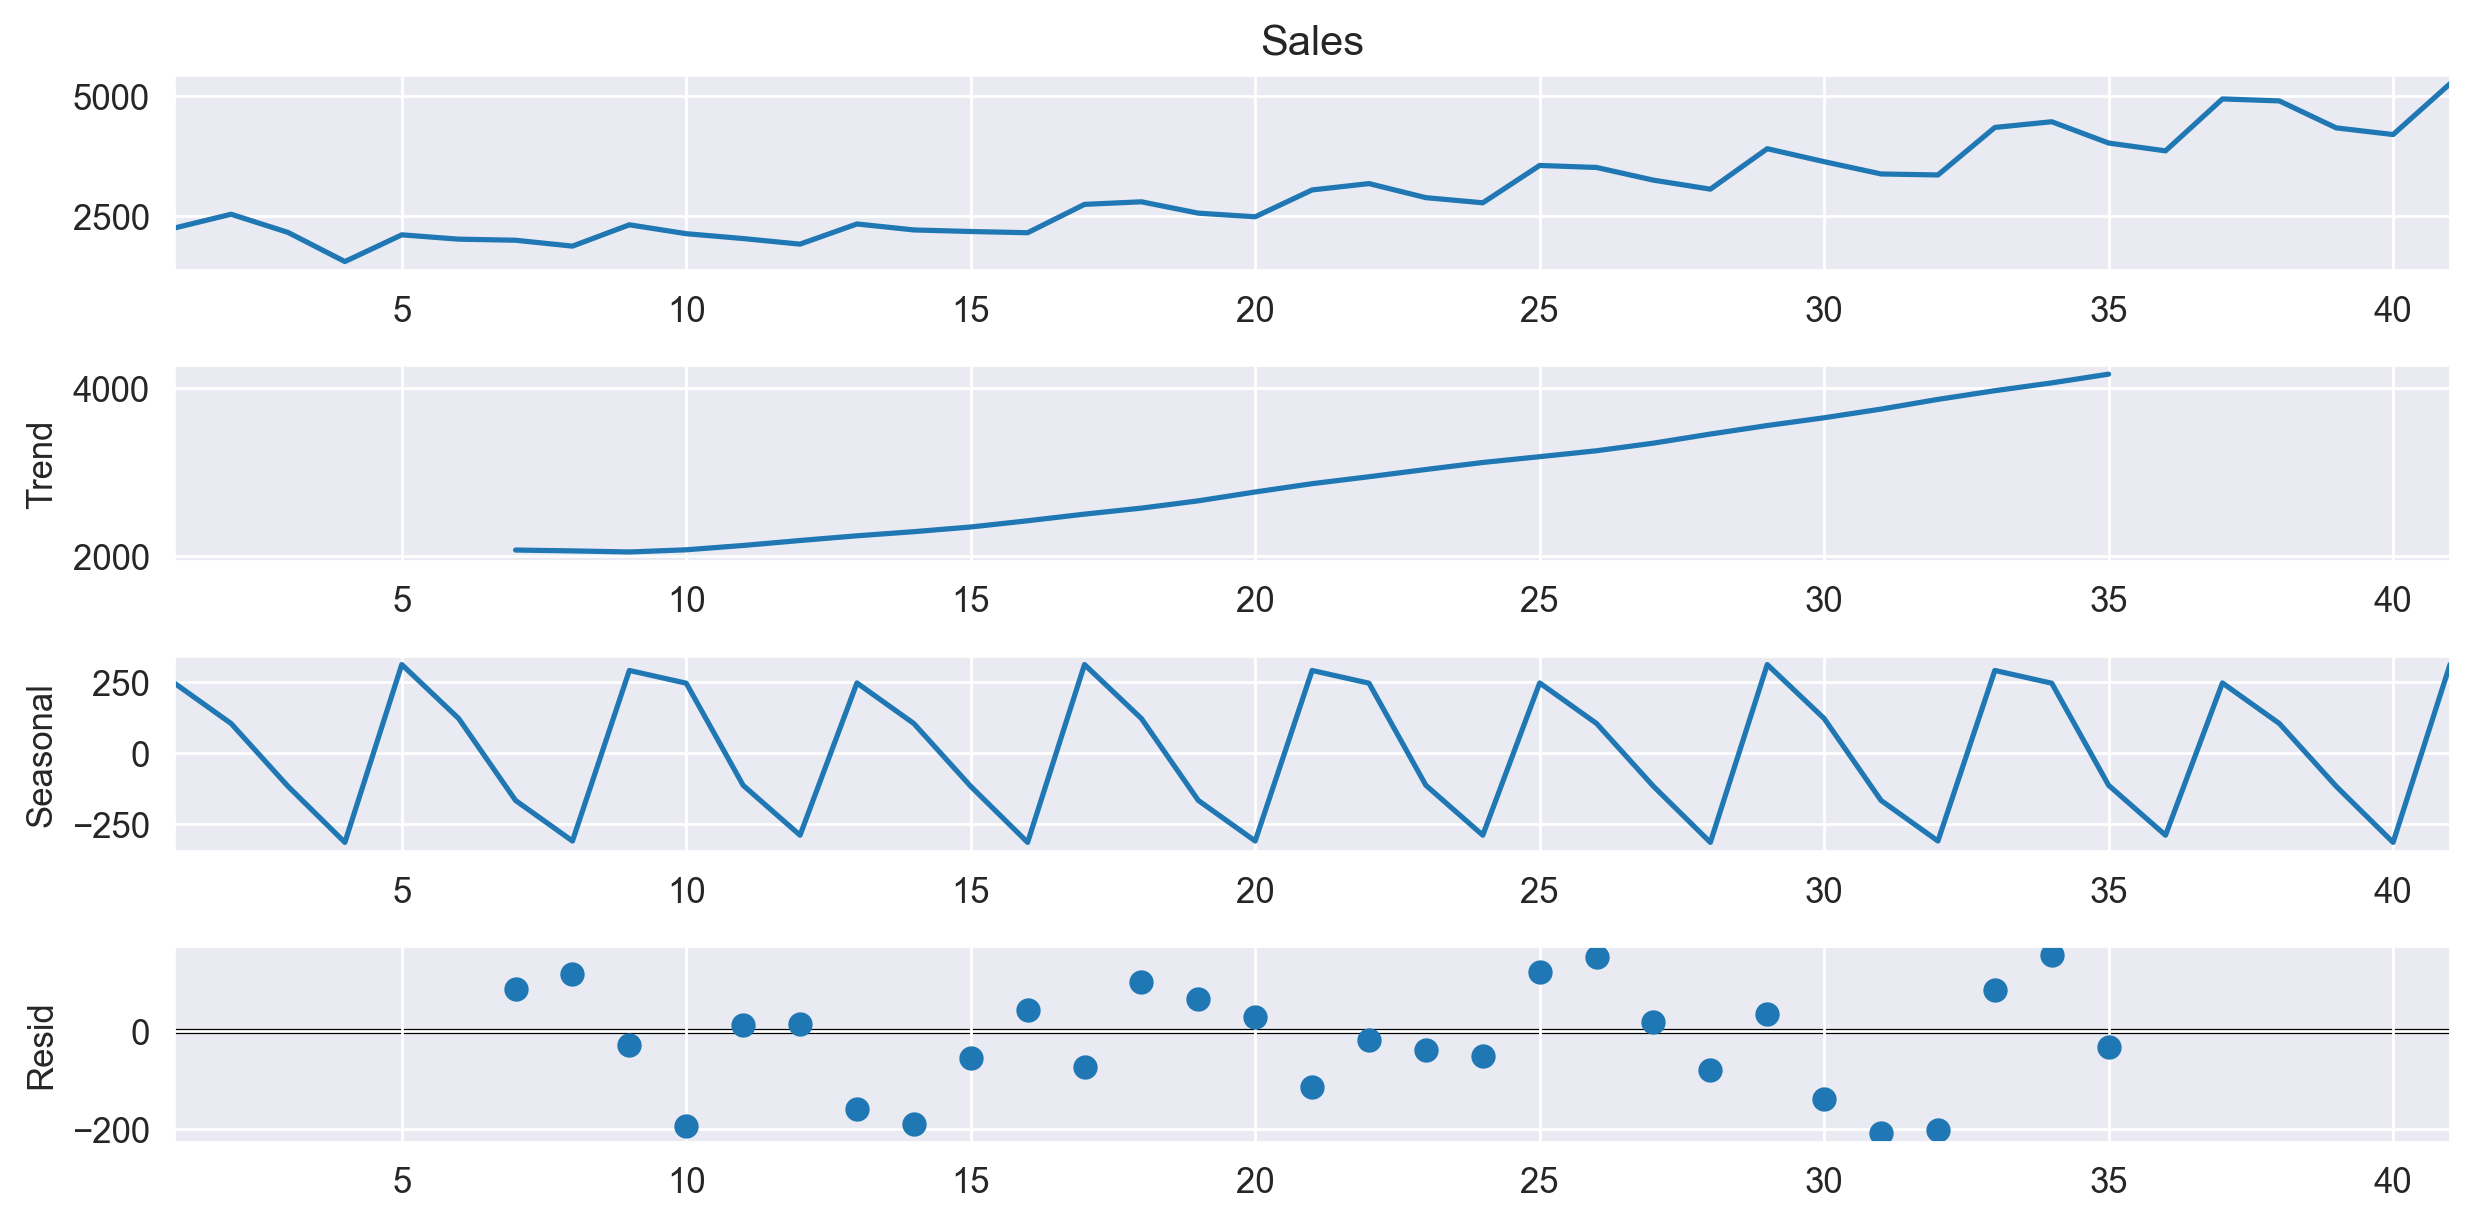

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data['Sales'], period = 12)
decompose_ts_add.plot();

In [42]:
# data splitting

In [43]:
train = data.head(35)
test = data.tail(6)

In [44]:
train

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square,Q1,Q2,Q3,Q4,First_order
1,Q2_86,2244.960999,Q2,1986,2,7.716443,4,0,1,0,0,510.133999
2,Q3_86,2533.804993,Q3,1986,3,7.837477,9,0,0,1,0,288.843994
3,Q4_86,2154.962997,Q4,1986,4,7.675529,16,0,0,0,1,-378.841995
4,Q1_87,1547.818996,Q1,1987,5,7.344602,25,1,0,0,0,-607.144001
5,Q2_87,2104.411995,Q2,1987,6,7.651791,36,0,1,0,0,556.592999
6,Q3_87,2014.362999,Q3,1987,7,7.608058,49,0,0,1,0,-90.048996
7,Q4_87,1991.746998,Q4,1987,8,7.596767,64,0,0,0,1,-22.616001
8,Q1_88,1869.049999,Q1,1988,9,7.533186,81,1,0,0,0,-122.696999
9,Q2_88,2313.631996,Q2,1988,10,7.746574,100,0,1,0,0,444.581997
10,Q3_88,2128.320000,Q3,1988,11,7.663088,121,0,0,1,0,-185.311996


In [45]:
test

,Quarter,Sales,Quarters,Years,t,log_Sales,t_square,Q1,Q2,Q3,Q4,First_order
36,Q1_95,3854.0,Q1,1995,37,8.256867,1369,1,0,0,0,-163.0
37,Q2_95,4936.0,Q2,1995,38,8.504311,1444,0,1,0,0,1082.0
38,Q3_95,4895.0,Q3,1995,39,8.495970,1521,0,0,1,0,-41.0
39,Q4_95,4333.0,Q4,1995,40,8.374015,1600,0,0,0,1,-562.0
40,Q1_96,4194.0,Q1,1996,41,8.341410,1681,1,0,0,0,-139.0
41,Q2_96,5253.0,Q2,1996,42,8.566555,1764,0,1,0,0,1059.0


**Data Driven Methods:**
    
    1) Moving average method

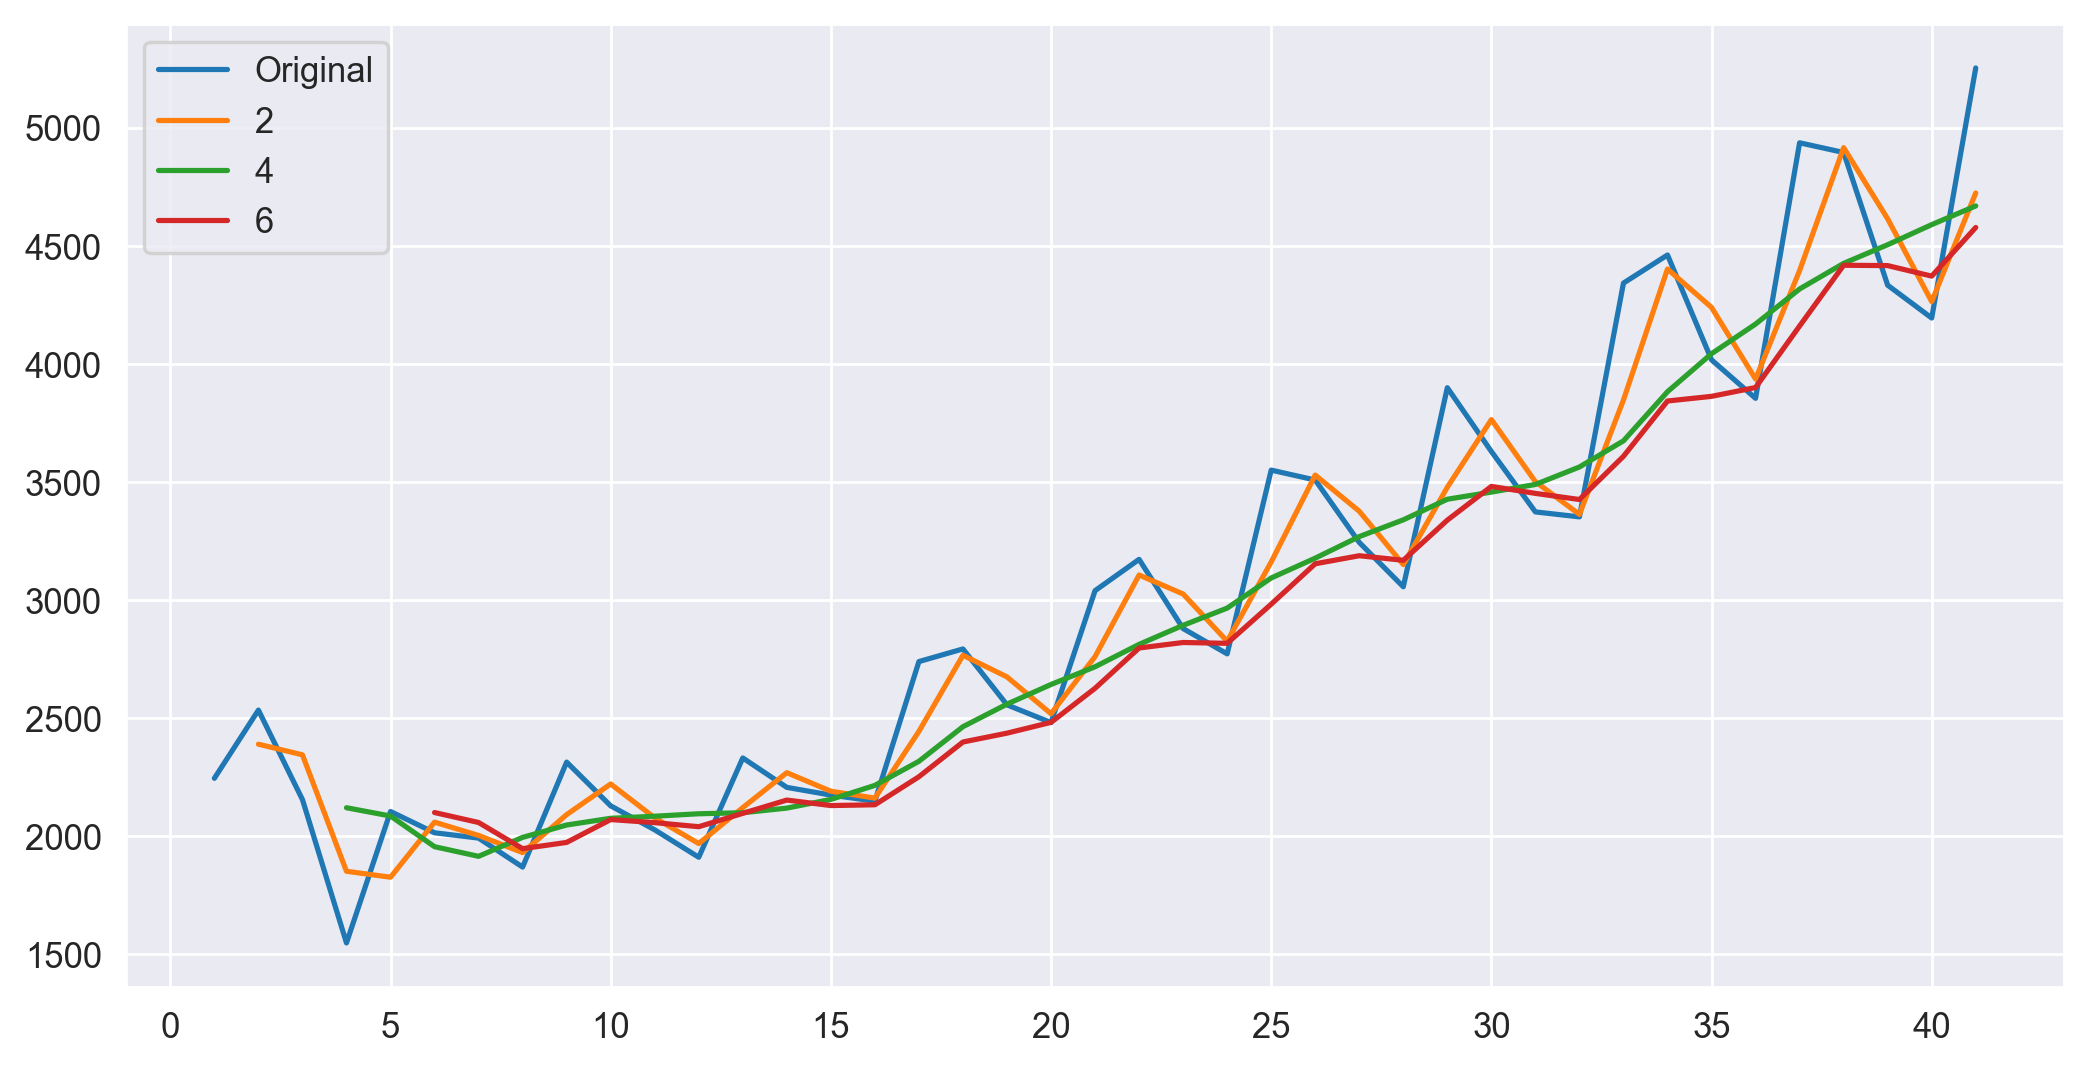

In [46]:
plt.plot(data['Sales'], label = 'Original')
plt.plot(data['Sales'].rolling(2).mean(), label = '2')
plt.plot(data['Sales'].rolling(4).mean(), label = '4')
plt.plot(data['Sales'].rolling(6).mean(), label = '6')
plt.legend()

2) Exponential smoothing

In [47]:
# Libraries

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

1. Simple Exponential smoothing Method

In [50]:
sim_exp = SimpleExpSmoothing(train['Sales']).fit(smoothing_level = 0.2)
pred_sim_exp = sim_exp.predict(start = test['Sales'].index[0], end = test['Sales'].index[-1])
RMSE_se = np.sqrt(mean_squared_error(test['Sales'], pred_sim_exp))
print('RMSE: ', round(RMSE_se, 3))

RMSE:  937.177


2. Holts Method

In [51]:
holts = Holt(train['Sales']).fit(smoothing_level = 0.8, smoothing_trend = 0.2)
pred_holts = holts.predict(start = test['Sales'].index[0], end = test['Sales'].index[-1])
RMSE_h = np.sqrt(mean_squared_error(test['Sales'], pred_holts))
print('RMSE: ', round(RMSE_h, 3))

RMSE:  445.014


3. Holt-Winters Method

   i) Holts winter exponential smoothing with additive seasonality and additive trend

In [52]:
hw_exp_1 = ExponentialSmoothing(train['Sales'], seasonal = 'additive', trend = 'additive', seasonal_periods = 12).fit()
pred_hw_exp_1 = hw_exp_1.predict(start = test['Sales'].index[0], end = test['Sales'].index[-1])
RMSE_hwe_1 = np.sqrt(mean_squared_error(test['Sales'], pred_hw_exp_1))
print('RMSE: ', round(RMSE_hwe_1, 3))

RMSE:  525.43


ii) Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [53]:
hw_exp_2 = ExponentialSmoothing(train['Sales'], seasonal = 'multiplicative', trend = 'additive', seasonal_periods = 12).fit()
pred_hw_exp_2 = hw_exp_2.predict(start = test['Sales'].index[0], end = test['Sales'].index[-1])
RMSE_hwe_2 = np.sqrt(mean_squared_error(test['Sales'], pred_hw_exp_2))
print('RMSE: ', round(RMSE_hwe_2, 3))

RMSE:  610.796


In [54]:
# Exponential Smoothing Models

In [55]:
df1 = pd.DataFrame({
    'Models' : ['sim_exp', 'holts', 'hw_exp_1', 'hw_exp_2'],
    'RMSE' : [RMSE_se, RMSE_h, RMSE_hwe_1, RMSE_hwe_2]
}) 

In [56]:
df1

,Models,RMSE
0,sim_exp,937.177113
1,holts,445.013810
2,hw_exp_1,525.429674
3,hw_exp_2,610.796070


**Model Based Methods**

In [57]:
import statsmodels.formula.api as smf

1. Linear Model

In [58]:
linear_model = smf.ols('Sales ~ t', data = train).fit()
pred_linear = linear_model.predict(test['t'])
RMSE_linear = np.sqrt(mean_squared_error(test['Sales'], pred_linear))
print('RMSE: ', RMSE_linear)

RMSE:  659.9510762819538


2. Exponential Model

In [59]:
Exponential_model  = smf.ols('log_Sales ~ t', data = train).fit()
pred_exp = Exponential_model.predict(test['t'])
RMSE_exp = np.sqrt(mean_squared_error(test['Sales'], np.exp(pred_exp)))
print('RMSE: ', RMSE_exp)

RMSE:  528.7077786851211


3. Quadratic Model

In [60]:
Quadratic_model  = smf.ols('Sales ~ t+t_square', data = train).fit()
pred_quad = Quadratic_model.predict(test[['t', 't_square']])
RMSE_quad = np.sqrt(mean_squared_error(test['Sales'], pred_quad))
print('RMSE: ', RMSE_quad)

RMSE:  507.26341142967266


4. Additive Seasonality

In [61]:
add_sea  = smf.ols('Sales ~ Q1+Q2+Q3', data = train).fit()
pred_add_sea = add_sea.predict(test[['Q1','Q2','Q3']])
RMSE_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea))
print('RMSE: ', RMSE_add_sea)

RMSE:  1874.010643958204


5. Additive Seasonality with Quadratic Model

In [62]:
add_sea_quad  = smf.ols('Sales ~ t+t_square+Q1+Q2+Q3', data = train).fit()
pred_add_sea_quad = add_sea_quad.predict(test[['t','t_square','Q1','Q2','Q3']])
RMSE_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea_quad))
print('RMSE: ', RMSE_add_sea_quad)

RMSE:  277.89959807254945


6. Multiplicative Seasonality

In [63]:
multi_sea  = smf.ols('log_Sales ~ Q1+Q2+Q3', data = train).fit()
pred_multi_sea = multi_sea.predict(test[['Q1','Q2','Q3']])
RMSE_multi_sea = np.sqrt(mean_squared_error(test['Sales'], np.exp(pred_multi_sea)))
print('RMSE: ', RMSE_multi_sea)

RMSE:  1958.841095573541


7. Multiplicative Seasonality with Additive(linear) Trend

In [64]:
multi_sea_add  = smf.ols('log_Sales ~ t+Q1+Q2+Q3', data = train).fit()
pred_multi_sea_add = multi_sea_add.predict(test[['t','Q1','Q2','Q3']])
RMSE_multi_sea_add = np.sqrt(mean_squared_error(test['Sales'], np.exp(pred_multi_sea_add)))
print('RMSE: ', RMSE_multi_sea_add)

RMSE:  292.6799538353263


In [65]:
# Model based method

In [66]:
df2 = pd.DataFrame({
    'Models' : ['linear_model','Exponential_model','Quadratic_model','add_sea','add_sea_quad','multi_sea','multi_sea_add'],
    'RMSE' : [RMSE_linear, RMSE_exp, RMSE_quad, RMSE_add_sea, RMSE_add_sea_quad, RMSE_multi_sea, RMSE_multi_sea_add]
})

In [67]:
df2

,Models,RMSE
0,linear_model,659.951076
1,Exponential_model,528.707779
2,Quadratic_model,507.263411
3,add_sea,1874.010644
4,add_sea_quad,277.899598
5,multi_sea,1958.841096
6,multi_sea_add,292.679954


**ARIMA**

In [68]:
# Libraries

In [69]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [70]:
order = auto_arima(data['Sales'])
order

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [71]:
arima_model = ARIMA(train['Sales'], order = (3, 2, 2)).fit()
pred_arima = arima_model.predict(start = test['Sales'].index[0], end = test['Sales'].index[-1])
RMSE_arima = np.sqrt((mean_squared_error(test['Sales'], pred_arima)))
print('RMSE: ', RMSE_arima)

RMSE:  570.2726140392547


In [72]:
# Arima model

In [73]:
df3 = pd.DataFrame({
    'Models' : ['arima_model'],
    'RMSE' : [RMSE_arima]
})

In [74]:
df3

,Models,RMSE
0,arima_model,570.272614


In [75]:
# Merge all dataframes

In [76]:
df = pd.concat([df1,df2,df3], axis = 0)
df.sort_values(['RMSE'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Models,RMSE
0,add_sea_quad,277.899598
1,multi_sea_add,292.679954
2,holts,445.013810
3,Quadratic_model,507.263411
4,hw_exp_1,525.429674
5,Exponential_model,528.707779
6,arima_model,570.272614
7,hw_exp_2,610.796070
8,linear_model,659.951076
9,sim_exp,937.177113


- Additive seasonality with quadratic trend gives lowest RMSE value

**New Data for Forecasting**

In [77]:
new_data = pd.DataFrame({
    'Quarter' : ['Q3','Q4','Q1','Q2','Q3','Q4']
})

In [78]:
new_data

,Quarter
0,Q3
1,Q4
2,Q1
3,Q2
4,Q3
5,Q4


In [79]:
# new_data['Date'] = pd.DatetimeIndex(new_data['Date'])

new_data['t'] = np.arange(43,49)
new_data['t_square'] = np.square(new_data['t'])

In [80]:
# new_data["Month"] = new_data.Date.dt.strftime("%b")
new_data

,Quarter,t,t_square
0,Q3,43,1849
1,Q4,44,1936
2,Q1,45,2025
3,Q2,46,2116
4,Q3,47,2209
5,Q4,48,2304


In [81]:
new_data = pd.get_dummies(data = new_data, columns = ['Quarter'], prefix = '', prefix_sep = '')
new_data

,t,t_square,Q1,Q2,Q3,Q4
0,43,1849,0,0,1,0
1,44,1936,0,0,0,1
2,45,2025,1,0,0,0
3,46,2116,0,1,0,0
4,47,2209,0,0,1,0
5,48,2304,0,0,0,1


Combining train and test data and building final model using additive seasonality with quadratic trend.

In [82]:
add_sea_quad_final  = smf.ols('Sales ~ t+t_square+Q1+Q2+Q3', data = data).fit()
pred_add_sea_quad_final = add_sea_quad.predict(new_data[['t','t_square','Q1','Q2','Q3']])
round(pred_add_sea_quad_final, 3)

0    5486.852
1    5359.722
2    5324.119
3    6075.913
4    6177.561
5    6066.827
dtype: float64

In [83]:
pred_add_sea_quad_final.values.round(3)

array([5486.852, 5359.722, 5324.119, 6075.913, 6177.561, 6066.827])

In [84]:
df4 = pd.DataFrame(index = [42,43,44,45,46,47])
df4['pred_sales'] = [5486.852, 5359.722, 5324.119, 6075.913, 6177.561, 6066.827]
df4

,pred_sales
42,5486.852
43,5359.722
44,5324.119
45,6075.913
46,6177.561
47,6066.827


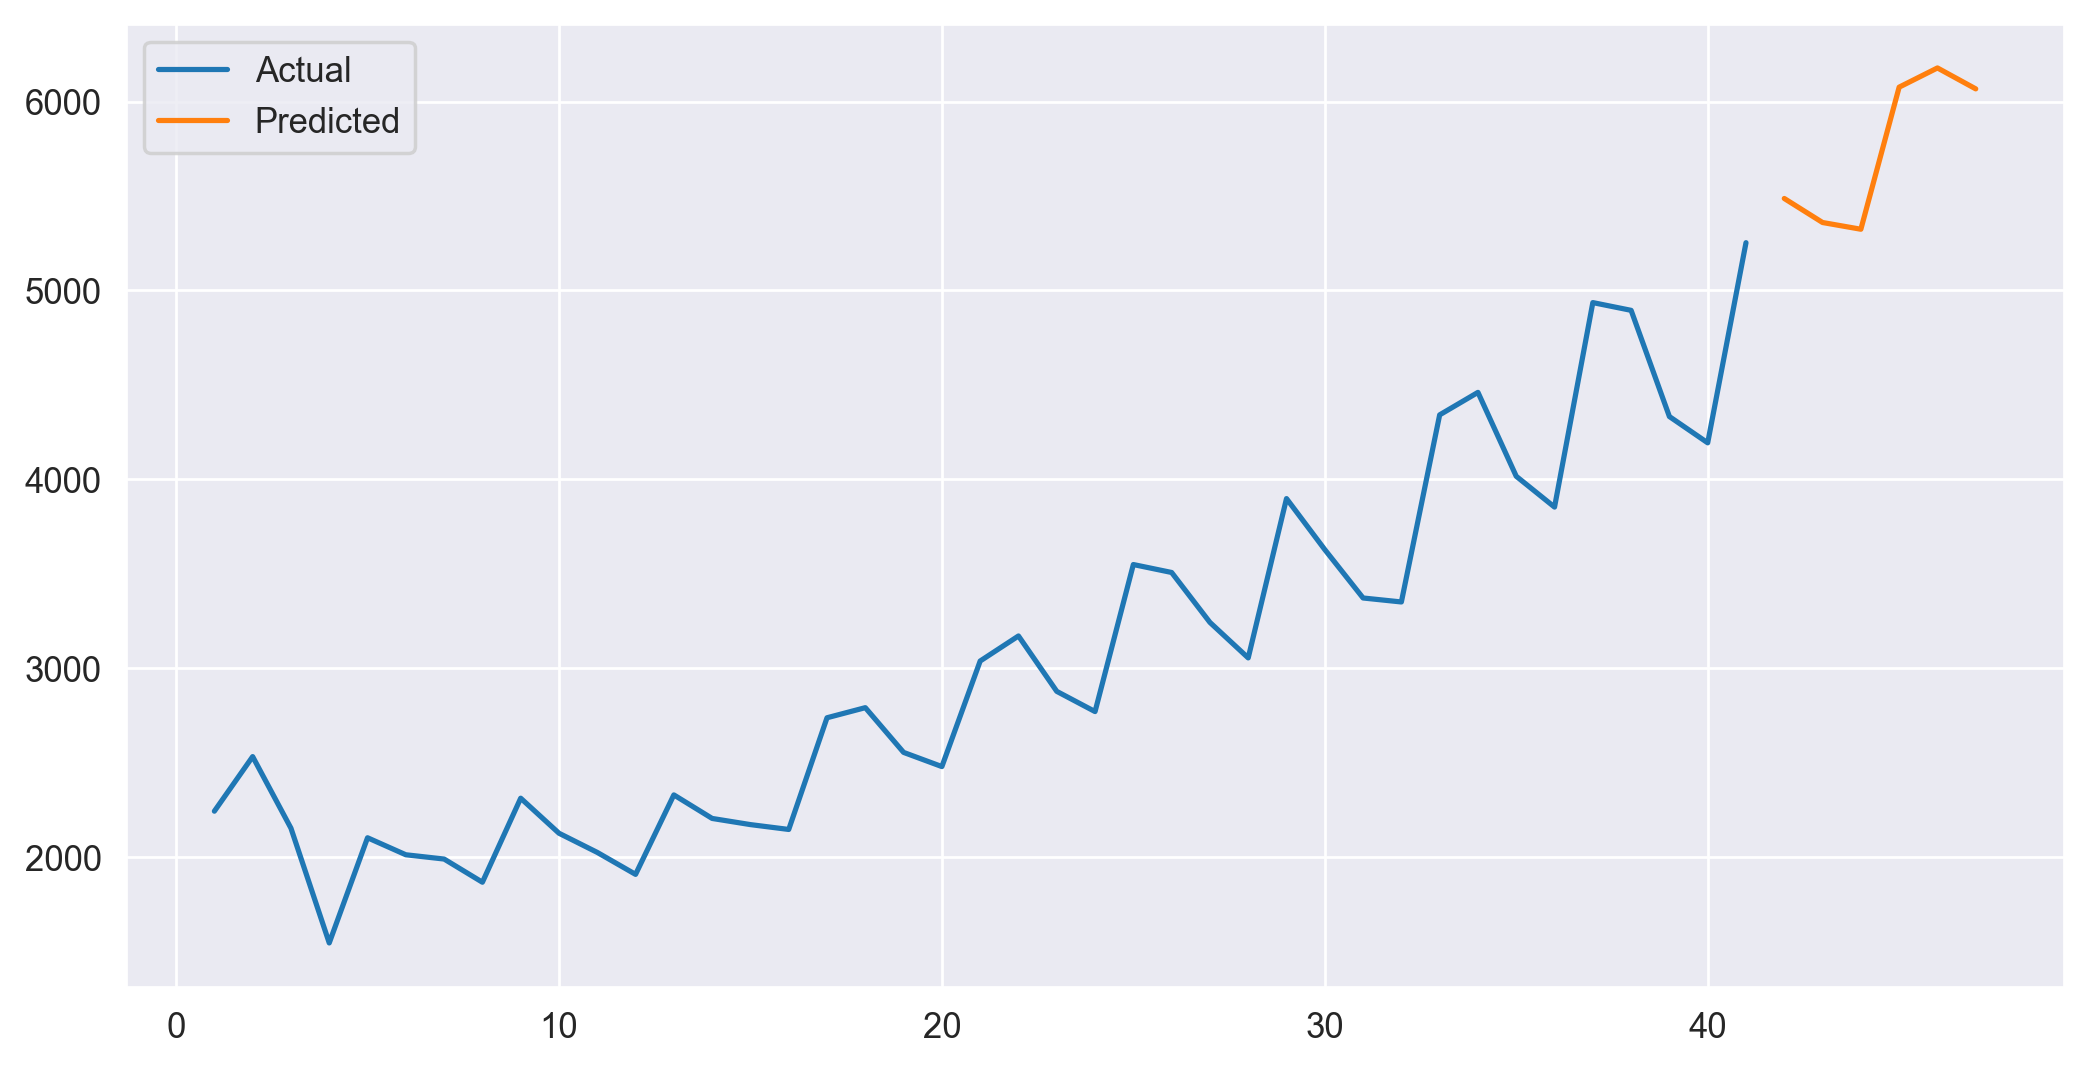

In [85]:
plt.plot(data['Sales'], label = 'Actual')
plt.plot(df4, label = 'Predicted')
plt.legend()